# Rotten Tomatoes Project
## Overview

Back in 2015 [FiveThirtyEight published a now famous analysis](http://fivethirtyeight.com/features/fandango-movies-ratings/) in uncovering how **Fandanago**, a movie ticket sales site, appeared to have a lopsided ratings curve where barely any films were rated lower than 3 stars due to rounding. The findings discovered that this also caused many outliers to be rounded incorrectly and Fandanago responded that it was due to an error in the code.
<br>
<br>
![538](https://fivethirtyeight.com/wp-content/uploads/2015/10/hickey-datalab-fandango-1-just_fandango.png?w=610)
<br>
<br>
At the time, **Fandango** had their own movie ratings submitted by users that were displayed alongside the movie in question. Perhaps some may have suspected Fandango needed to sell tickets and aggregated scores more positively by rounding up in order to sell even more. However, the discrepancies as noted above, were more likely due to computational and human error.

Movie review websites have become huge business, but can you still trust online ratings even now? When you 'Google' [Moonfall](https://www.google.com/search?q=moonfall&sxsrf=APq-WBtP1U1002kzdjwS-6zCcmPCDhNRIA%3A1650915719593&source=hp&ei=h_lmYqGQH-PJ7gLUrpuYDw&iflsig=AHkkrS4AAAAAYmcHlyjJpuVxBzf1VRazGWW0iRJux92Y&ved=0ahUKEwjh74-o_K_3AhXjpFsKHVTXBvMQ4dUDCAg&uact=5&oq=moonfall&gs_lcp=Cgdnd3Mtd2l6EAMyCwguEIAEELEDENQCMggIABCABBCxAzIICAAQgAQQsQMyCAgAEIAEELEDMggIABCABBCxAzIICAAQgAQQsQMyCAgAEIAEELEDMggIABCABBCxAzIFCAAQgAQyCwgAEIAEELEDEIMBOgsILhCABBCxAxCDAToRCC4QgAQQsQMQgwEQxwEQowI6EQguEIAEELEDEMcBEKMCENQCOgUILhCABDoICAAQsQMQgwE6CwguELEDEIMBENQCOggILhCABBCxAzoOCC4QgAQQsQMQgwEQ1AI6CwguEIAEEMcBEK8BOg4ILhCxAxCDARDHARCjAjoLCAAQgAQQsQMQyQNQAFiyB2DECGgAcAB4AIABX4gBhwWSAQE4mAEAoAEB&sclient=gws-wiz) the latest, and greatest disaster film of 2022 you are also shown aggregated reviews from IMDb, Rotten Tomatoes, Facebook, and Google users. These sites, as pointed out in the 538 article, are sometimes blamed for poor opening weekends. While this mentality seems to persist among critics of aggregate review sites, the reality of whether or not they affect sales is a bit more complicated as pointed out by Alissa Wilkinson in her ["Rotten Tomatoes, Explained"](https://www.vox.com/culture/2017/8/31/16107948/rotten-tomatoes-score-get-their-ratings-top-critics-certified-fresh-aggregate-mean) article.

**Rotten Tomatoes**, in particular, has become well-known and nearly ubiqutious in the review-aggregation space, so much so that the aformentioned **Fandanago** decided to acquire **Rotten Tomatoes** dropping their own review aggregation altogether in favor of introducing what has famously become known as the "Tomatometer". The site has become far more popular since the acquisition with marketers now adjusting advertisements for shows or films based on how "fresh" the rating is. 

The "Tomato-meter" will give a "Certified Fresh", "Fresh", "Rotten" based on the number of the overall positive reviews from critics. Anything that receives over 60% positive ratings is considered "Fresh", over 75% positive ratings and additional stipulations including being reviewed by at least 80 Critics is considered "Certified Fresh", and below 59% positive ratings is considered "Rotten."

***

[Gizmodo cited](https://gizmodo.com/fandango-will-probably-ruin-rotten-tomatoes-1759743925) the study following the acquisition and theorized the acquistion would ruin the site. But, was this actually the case? When Fandanago still had their own aggregated reviews, they rectified the earlier glitch that had been found by studious Data Analysts.

***

### This project is designed to answer the following questions:

 * What was the distribution of aggregated reviews in 2015 compared to 2016?
 * Were any films biased towards a higher rating following the acquisition?
 * Are there any discrepancies in the final average review ratings?
 * Can we predict how much reviews and/or verified critics will be grow into the future?
 

### The Data

The data used for this project was scraped by Kaggle user 'Stefano Leone' and made freely available to anyone [here](https://www.kaggle.com/code/stefanoleone992/rotten-tomatoes-eda/data).

#### rotten_tomatoes_critic_reviews.csv
#### rotten_tomatoes_movies.csv

***

'rotten_tomatoes_critic_reviews.csv' CSV file containing all the critic reviews for the movie available on Rotten Tomatoes

Column | Definition
--- | -----------
rotten_tomatoes_link | the link RT uses for the film
critic_name | name of critic
top_critic | 'True' or 'False' if they are Top Critic
publisher_name | Name of the Publisher where the review came from
review_type | Whether reviewer marked film as "Fresh" or "Rotten"
review_score | If the reviewer gave their review a grading (number or letter rating)
review_date | When the review was published
review_content | The content of the review itself

'rotten_tomatoes_movies.csv' CSV file containing all the data for the movies available on Rotten Tomatoes

Column | Definition
--- | -----------
rotten_tomatoes_link | the link RT uses for the film
movie_title | Name of the Film
movie_info | A short blurb about the film
critics_consensus | A consensus written by the longtime author working for RT, Jeff Giles
content_rating | Age group film is meant for
genres | The genre the film is considered
directors | Name of Director(s)
authors | Name of the Writer(s)
actors | Name of all Actors in film
original_release_date | When the film was originally released
streaming_release_date | When the film first became available on a streaming service
runtime | Length of the Film
production_company | Name of Production Company
tomatometer_status | Certified-Fresh (100-75%, and other factors), Fresh (60%-100%), or Rotten (0-59%)
tomatometer_rating | The aggregated score at time of scrape
tomatometer_count | The number of reviews
audience_status | Aggregated Audience Reviews either as Spilled or Upright
audience_rating | The rating as a percentage (users give 0-5)
audience_count | The number of reviews
tomatometer_top_critics_count | Count of reviews from top critics
tomatometer_fresh_critics_count | Count of critics that gave fresh rating
tomatometer_rotten_critics_count | Count of critics that gave rotten rating

### Imports

In [1]:
# Import Code
import numpy as np
from pandas import read_html
import pandas as pd
import math

import re 
from plotly.offline import init_notebook_mode,iplot

# Import Visualization Tools
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import style
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

init_notebook_mode(connected=True)
pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment = None

### Read in CSV files

In [2]:
rt_critics = pd.read_csv("rotten_tomatoes_critic_reviews.csv")
rt_movies = pd.read_csv("rotten_tomatoes_movies.csv")

In [3]:
rt_critics.head()

rotten_tomatoes_link      critic_name  top_critic           publisher_name  \
0            m/0814255  Andrew L. Urban       False           Urban Cinefile   
1            m/0814255    Louise Keller       False           Urban Cinefile   
2            m/0814255              NaN       False      FILMINK (Australia)   
3            m/0814255     Ben McEachen       False  Sunday Mail (Australia)   
4            m/0814255      Ethan Alter        True       Hollywood Reporter   

  review_type review_score review_date  \
0       Fresh          NaN  2010-02-06   
1       Fresh          NaN  2010-02-06   
2       Fresh          NaN  2010-02-09   
3       Fresh        3.5/5  2010-02-09   
4      Rotten          NaN  2010-02-10   

                                      review_content  
0  A fantasy adventure that fuses Greek mythology...  
1  Uma Thurman as Medusa, the gorgon with a coiff...  
2  With a top-notch cast and dazzling special eff...  
3  Whether audiences will get behind The Lightnin...  
4  What's really lacking in The Lightning Thief i...

In [4]:
rt_critics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1130017 entries, 0 to 1130016
Data columns (total 8 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   rotten_tomatoes_link  1130017 non-null  object
 1   critic_name           1111488 non-null  object
 2   top_critic            1130017 non-null  bool  
 3   publisher_name        1130017 non-null  object
 4   review_type           1130017 non-null  object
 5   review_score          824081 non-null   object
 6   review_date           1130017 non-null  object
 7   review_content        1064211 non-null  object
dtypes: bool(1), object(7)
memory usage: 61.4+ MB


In [5]:
rt_movies.head()

rotten_tomatoes_link  \
0                              m/0814255   
1                              m/0878835   
2                                   m/10   
3                 m/1000013-12_angry_men   
4  m/1000079-20000_leagues_under_the_sea   

                                         movie_title  \
0  Percy Jackson & the Olympians: The Lightning T...   
1                                        Please Give   
2                                                 10   
3                    12 Angry Men (Twelve Angry Men)   
4                       20,000 Leagues Under The Sea   

                                          movie_info  \
0  Always trouble-prone, the life of teenager Per...   
1  Kate (Catherine Keener) and her husband Alex (...   
2  A successful, middle-aged Hollywood songwriter...   
3  Following the closing arguments in a murder tr...   
4  In 1866, Professor Pierre M. Aronnax (Paul Luk...   

                                   critics_consensus content_rating  \
0  Though it may seem like just another Harry Pot...             PG   
1  Nicole Holofcener's newest might seem slight i...              R   
2  Blake Edwards' bawdy comedy may not score a pe...              R   
3  Sidney Lumet's feature debut is a superbly wri...             NR   
4  One of Disney's finest live-action adventures,...              G   

                                              genres          directors  \
0  Action & Adventure, Comedy, Drama, Science Fic...     Chris Columbus   
1                                             Comedy  Nicole Holofcener   
2                                    Comedy, Romance      Blake Edwards   
3                                    Classics, Drama       Sidney Lumet   
4           Action & Adventure, Drama, Kids & Family  Richard Fleischer   

                                      authors  \
0  Craig Titley, Chris Columbus, Rick Riordan   
1                           Nicole Holofcener   
2                               Blake Edwards   
3                               Reginald Rose   
4                                 Earl Felton   

                                              actors original_release_date  \
0  Logan Lerman, Brandon T. Jackson, Alexandra Da...            2010-02-12   
1  Catherine Keener, Amanda Peet, Oliver Platt, R...            2010-04-30   
2  Dudley Moore, Bo Derek, Julie Andrews, Robert ...            1979-10-05   
3  Martin Balsam, John Fiedler, Lee J. Cobb, E.G....            1957-04-13   
4  James Mason, Kirk Douglas, Paul Lukas, Peter L...            1954-01-01   

  streaming_release_date  runtime      production_company tomatometer_status  \
0             2015-11-25    119.0        20th Century Fox             Rotten   
1             2012-09-04     90.0  Sony Pictures Classics    Certified-Fresh   
2             2014-07-24    122.0             Waner Bros.              Fresh   
3             2017-01-13     95.0    Criterion Collection    Certified-Fresh   
4             2016-06-10    127.0                  Disney              Fresh   

   tomatometer_rating  tomatometer_count audience_status  audience_rating  \
0                49.0              149.0         Spilled             53.0   
1                87.0              142.0         Upright             64.0   
2                67.0               24.0         Spilled             53.0   
3               100.0               54.0         Upright             97.0   
4                89.0               27.0         Upright             74.0   

   audience_count  tomatometer_top_critics_count  \
0        254421.0                             43   
1         11574.0                             44   
2         14684.0                              2   
3        105386.0                              6   
4         68918.0                              5   

   tomatometer_fresh_critics_count  tomatometer_rotten_critics_count  
0                               73                                76  
1                              123      

In [6]:
rt_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17712 entries, 0 to 17711
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   rotten_tomatoes_link              17712 non-null  object 
 1   movie_title                       17712 non-null  object 
 2   movie_info                        17391 non-null  object 
 3   critics_consensus                 9134 non-null   object 
 4   content_rating                    17712 non-null  object 
 5   genres                            17693 non-null  object 
 6   directors                         17518 non-null  object 
 7   authors                           16170 non-null  object 
 8   actors                            17360 non-null  object 
 9   original_release_date             16546 non-null  object 
 10  streaming_release_date            17328 non-null  object 
 11  runtime                           17398 non-null  float64
 12  prod

In [7]:
#locate specific film code (rt_movies)
data_film = rt_movies.loc[rt_movies['rotten_tomatoes_link'] == 'm/bad_boy_bubby']
data_film

rotten_tomatoes_link    movie_title  \
3101      m/bad_boy_bubby  Bad Boy Bubby   

                                             movie_info critics_consensus  \
3101  After being kept a prisoner in his own home fo...               NaN   

     content_rating                                    genres     directors  \
3101             NR  Art House & International, Comedy, Drama  Rolf de Heer   

           authors                                             actors  \
3101  Rolf de Heer  Nicholas Hope, Ralph Cotterill, Norman Kaye, A...   

     original_release_date streaming_release_date  runtime production_company  \
3101            2005-04-26             2016-08-10    112.0   Blue Underground   

     tomatometer_status  tomatometer_rating  tomatometer_count  \
3101              Fresh               100.0                9.0   

     audience_status  audience_rating  audience_count  \
3101         Upright             88.0          8039.0   

      tomatometer_top_critics_count  tomatometer_fresh_critics_count  \
3101                              2                                9   

      tomatometer_rotten_critics_count  
3101                                 0

In [8]:
#locate specific film code (rt_critics)
data_film2 = rt_critics.loc[rt_critics['rotten_tomatoes_link'] == 'm/bad_boy_bubby']
data_film2

rotten_tomatoes_link             critic_name  top_critic  \
156579      m/bad_boy_bubby             Andrew Howe       False   
156580      m/bad_boy_bubby             Joe Baltake       False   
156581      m/bad_boy_bubby  Urban Cinefile Critics       False   
156582      m/bad_boy_bubby         Dennis Schwartz       False   
156583      m/bad_boy_bubby        Christopher Null       False   
156584      m/bad_boy_bubby             Anton Bitel       False   

                       publisher_name review_type review_score review_date  \
156579          Film Written Magazine       Fresh        3.5/4  2001-09-25   
156580                 Sacramento Bee      Rotten          NaN  2001-09-25   
156581                 Urban Cinefile       Fresh          NaN  2005-08-30   
156582  Dennis Schwartz Movie Reviews       Fresh            B  2007-02-27   
156583                 Filmcritic.com       Fresh          4/5  2009-08-14   
156584              Projected Figures       Fresh          NaN  2016-06-01   

                                           review_content  
156579  A memorable, affecting and quietly exceptional...  
156580                                                NaN  
156581  The miracle of casting; with Bad Boy Bubby, Ro...  
156582  The success of the film is largely due to the ...  
156583  You may not understand Bubby, but damn if you ...  
156584  this dark satire-cum-parable (cling)wraps itse...

### Let's do some Exploratory Data Analysis

**First let's take a look at the relationship between the number of reviews and the ratings from critics.**

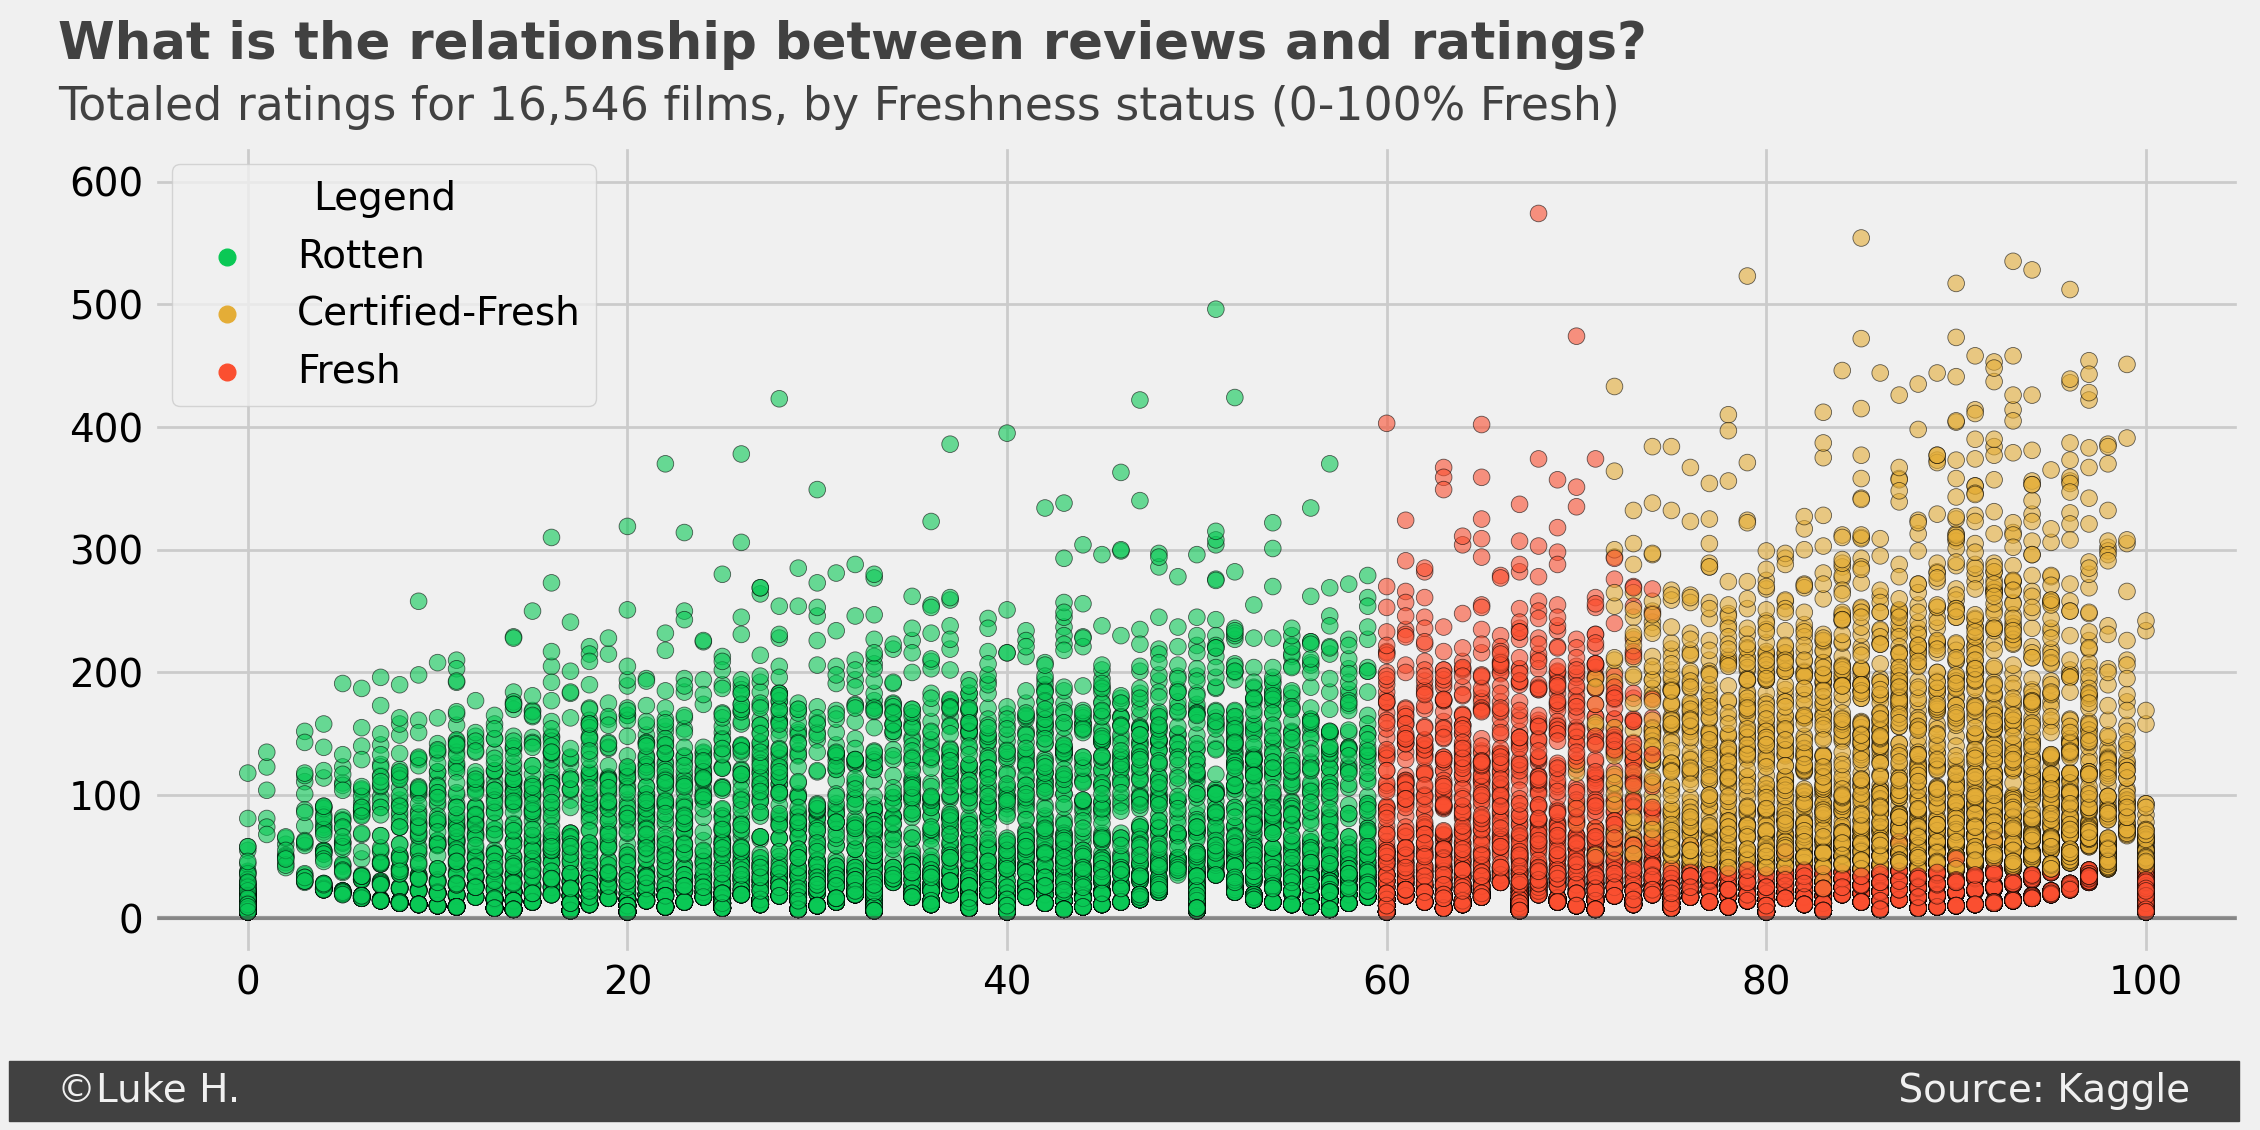

In [9]:
# Setting for FiveThirtyEight style
plt.style.use('fivethirtyeight')

#visual code
fig, ax = plt.subplots(figsize=(12,5), dpi=200)
#plt.figure(figsize=(12,5),dpi=200)
color_dict = dict({'Rotten':'#0AC855',
                  'Certified-Fresh':'#E4AD37',
                 'Fresh': '#FB4F30'})

#the plot
ax = sns.scatterplot(x='tomatometer_rating',y='tomatometer_count', 
                     hue='tomatometer_status',data=rt_movies, palette=color_dict,
                     edgecolor="black",linewidth=0.3, alpha=0.6)

# Limits
plt.ylim(-30,630)

# Bolded horizontal line at y=0
ax.axhline(y=0, color='#414141', linewidth=1.5, alpha=.5)

#labels
#plt.title("Relationship between Total Reviews and Final Ratings")
plt.xlabel("")
plt.ylabel("")

# Title text
ax.text(x=-10, y=700, s="What is the relationship between reviews and ratings?", fontsize=18.5, fontweight='semibold', color='#414141')

# Subtitle text
ax.text(x=-10, y=650, s='Totaled ratings for 16,546 films, by Freshness status (0-100% Fresh)', fontsize=16.5, color='#414141')

# Legend Labels
ax.legend(title = "Legend")

#Line at bottom for signature line
ax.text(x = -12, y = -150,
   s = '   ©Luke H.                                                                                                                                      Source: Kaggle   ',
   fontsize = 14, color = '#f0f0f0', backgroundcolor = '#414141');

There seems to more reviews for movies that are 50% and higher so let's see if that seems to be the case below.

<Figure size 2400x1000 with 0 Axes>

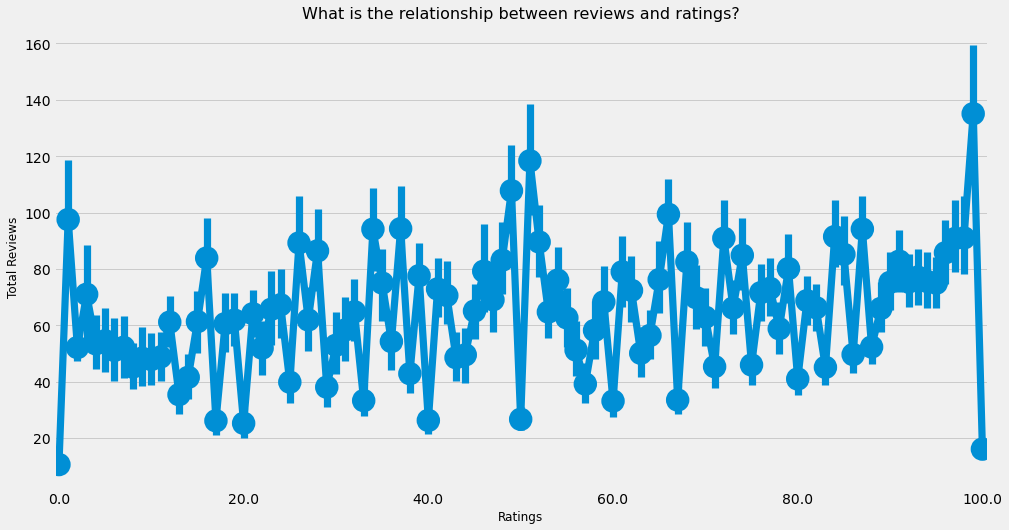

In [10]:
#Visualized as a Factor Plot
plt.figure(figsize=(12,5),dpi=200)

sns.catplot(x='tomatometer_rating',y='tomatometer_count',data=rt_movies,kind='point')
fig = plt.gcf()
fig.set_size_inches(18, 8)
plt.xlabel("Ratings",fontsize=12)
plt.ylabel("Total Reviews",fontsize=12)
plt.title("What is the relationship between reviews and ratings?", fontsize=16)
plt.xticks(np.arange(0, 101, step=20))
plt.show();

In [11]:
#Take a closer look
between_020 = rt_movies[rt_movies['tomatometer_rating'].between(0,20,inclusive='both')]
between_020['tomatometer_rating'].sum()

24965.0

In [12]:
between_2040 = rt_movies[rt_movies['tomatometer_rating'].between(20,40,inclusive='both')]
between_2040['tomatometer_rating'].sum()

87092.0

In [13]:
between_4060 = rt_movies[rt_movies['tomatometer_rating'].between(40,60,inclusive='both')]
between_4060['tomatometer_rating'].sum()

168268.0

In [14]:
between_6080 = rt_movies[rt_movies['tomatometer_rating'].between(60,80,inclusive='both')]
between_6080['tomatometer_rating'].sum()

304090.0

In [15]:
between_80100 = rt_movies[rt_movies['tomatometer_rating'].between(80,100,inclusive='both')]
between_80100['tomatometer_rating'].sum()

558117.0

In [16]:
between_4060['tomatometer_rating'].sum() + between_2040['tomatometer_rating'].sum() + between_020['tomatometer_rating'].sum()

280325.0

In [17]:
between_6080['tomatometer_rating'].sum() + between_80100['tomatometer_rating'].sum()

862207.0

Correlation between columns if any below

<AxesSubplot:>

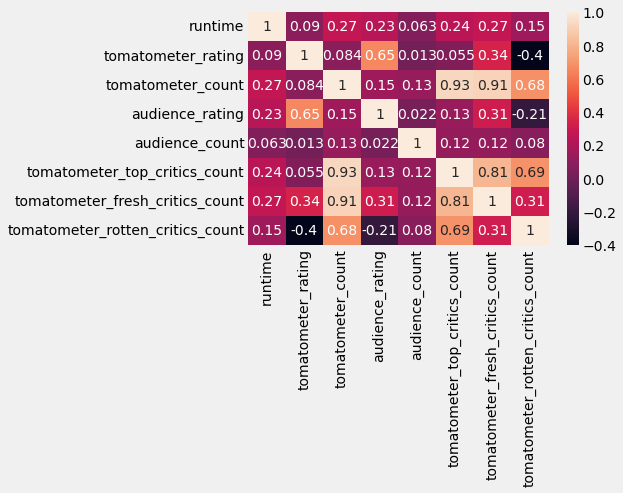

In [18]:
corr = rt_movies.corr()
sns.heatmap(corr, annot=True)

**New column to display year from original release date and set new column as movie_year**

In [19]:
rt_movies = rt_movies[rt_movies.original_release_date.notnull()]
rt_movies['original_release_date'] = pd.to_datetime(rt_movies['original_release_date'])
rt_movies['movie_year'] = rt_movies['original_release_date'].apply(lambda x: x.year)

**How many movies in dataframe and per year?**

In [20]:
pd.set_option("display.max_rows", 10)
rt_movies['movie_year'].value_counts().sum() #remove sum for count per year

16546

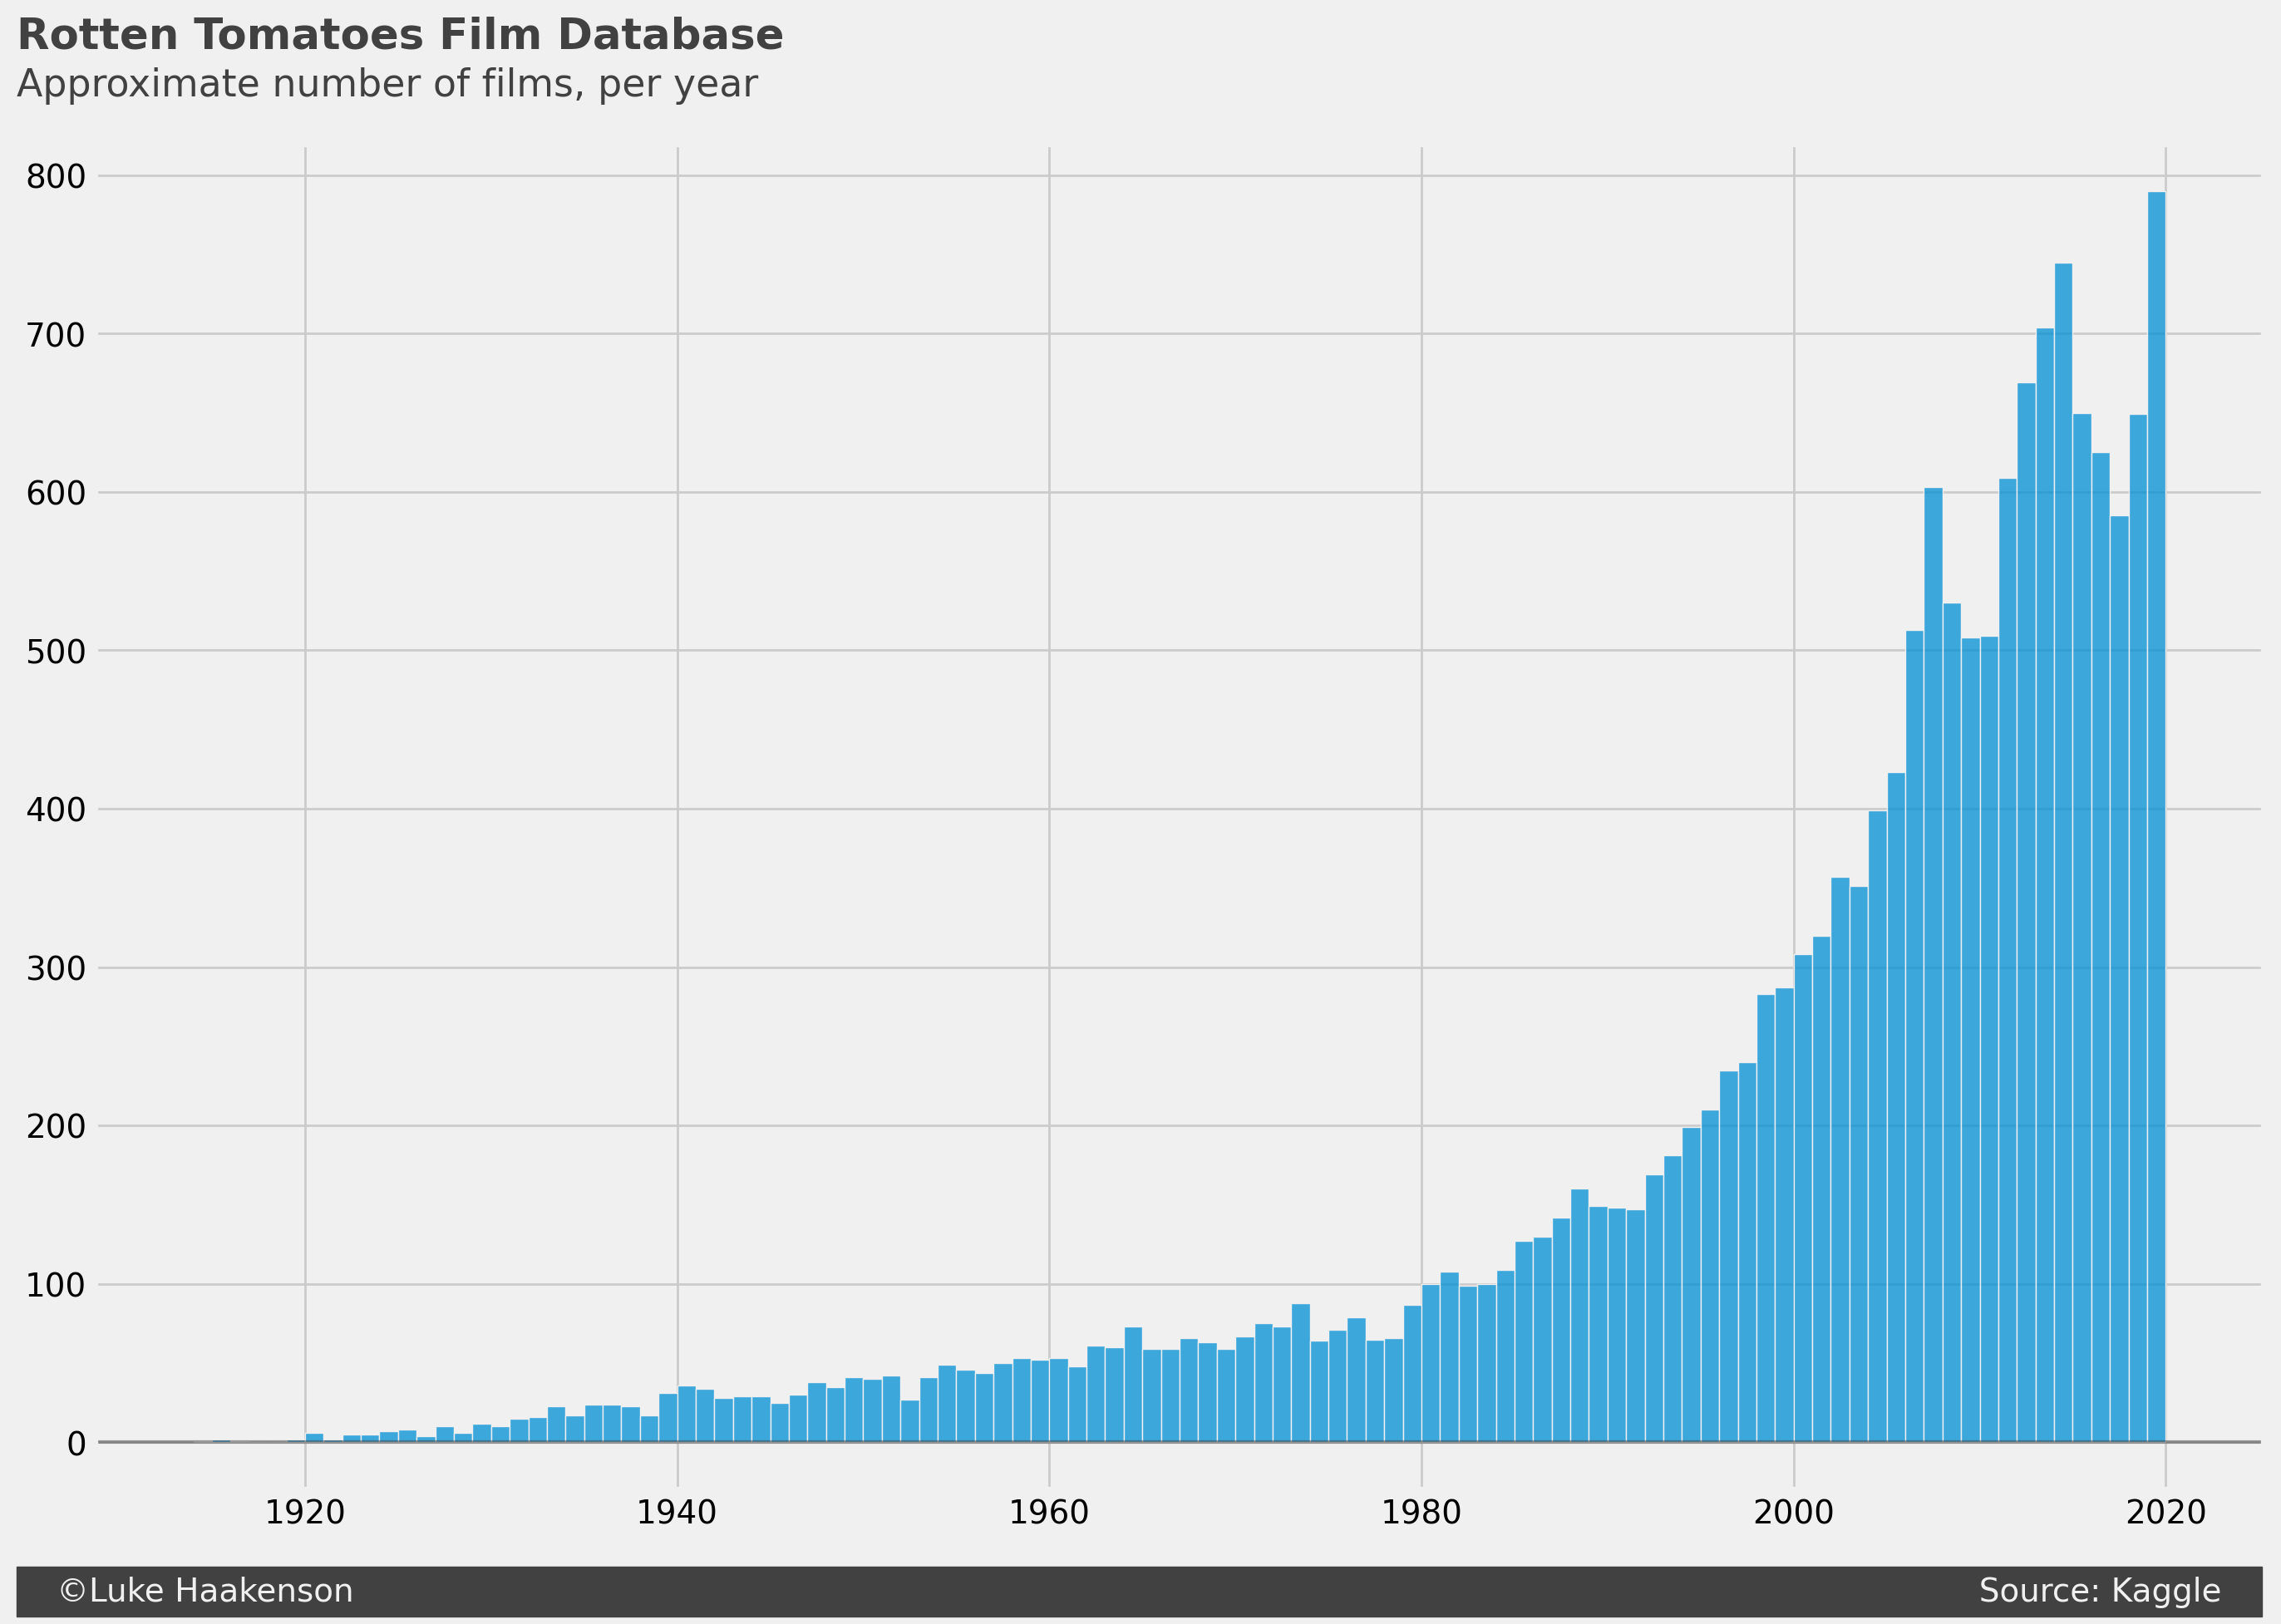

In [21]:
#style setting
plt.style.use('fivethirtyeight')

#visual code
fig, ax = plt.subplots(figsize=(15,10), dpi=200)

#plot type
ax = sns.histplot(x='movie_year', data=rt_movies, kde=False,binwidth=1)

# Range of years
#plt.xticks(np.arange(1920, 2021, step=5),rotation=45, ha='right');

# Limits
plt.ylim(-30,820)

# Bolded horizontal line at y=0
ax.axhline(y=0, color='#414141', linewidth=1.5, alpha=.5)

#labels
plt.xlabel("")
plt.ylabel("")

# Title text
ax.text(x=1904.5, y=880, s="Rotten Tomatoes Film Database", fontsize=18.5, fontweight='semibold', color='#414141')

# Subtitle text
ax.text(x=1904.5, y=850, s='Approximate number of films, per year', fontsize=16.5, color='#414141')

# Legend Labels
#ax.legend(title = "Legend")

#Line at bottom for signature line
ax.text(x = 1905, y = -100,
   s = '   ©Luke Haakenson                                                                                                                                                              Source: Kaggle   ',
   fontsize = 14, color = '#f0f0f0', backgroundcolor = '#414141');

A trend towards more films being made overall over several decades

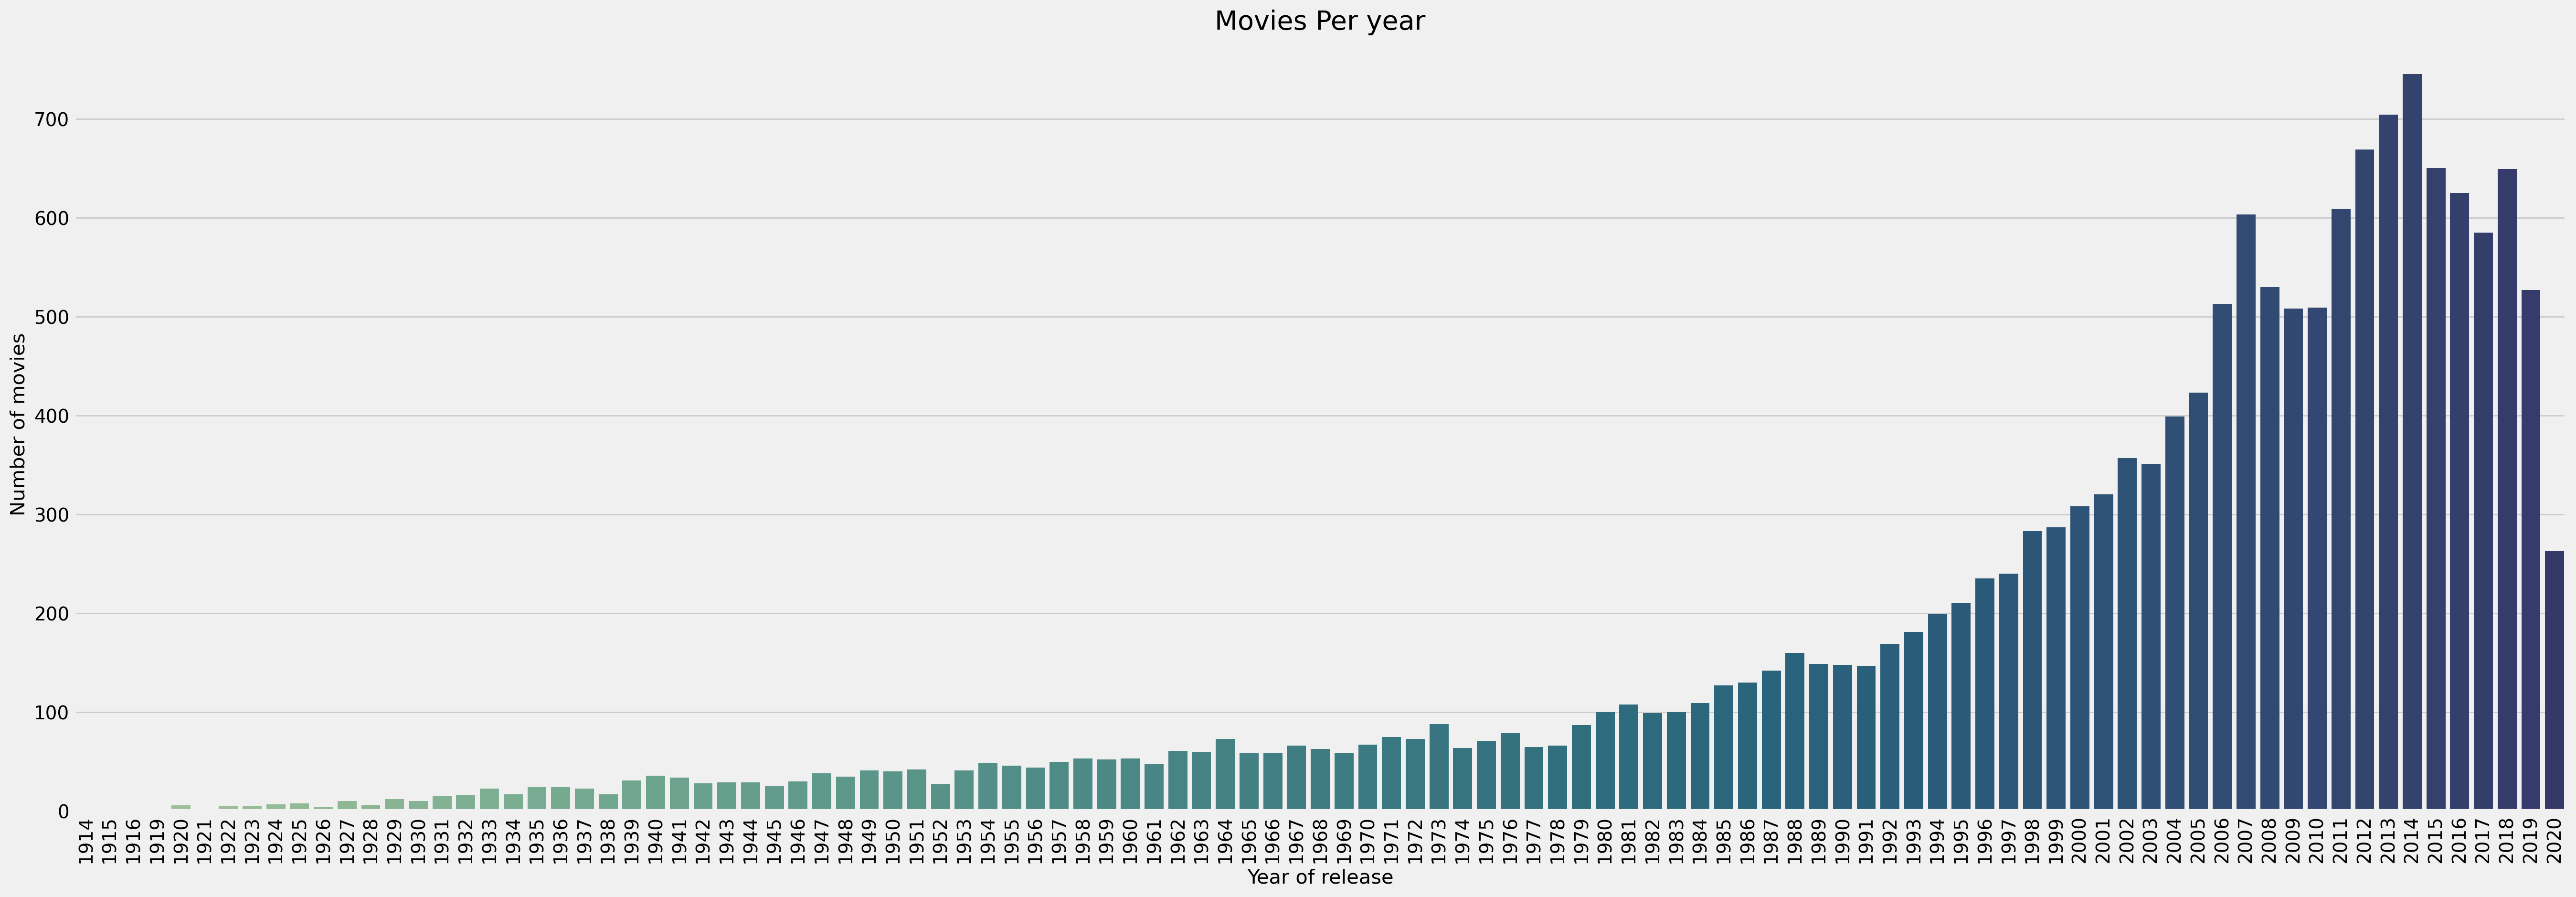

In [22]:
# As a count plot

#Define size
#sns.set(rc={"figure.figsize":(30, 20)})
plt.figure(figsize=(30,10),dpi=200)

#type of plot
g = sns.countplot(x='movie_year', data=rt_movies,palette="crest")

# Interval of years for x
#x_range = np.arange(1920,2020,5)

# label adjusted
#x_labels = ['' if i%5 != 0 else str(i) for i in range(len(np.unique(x_range)))]
#print(x_labels)

#labels
g.set_xticklabels(g.get_xticklabels(), rotation=90)
#g.set_xticklabels(x_labels, rotation=45)
plt.title('Movies Per year', size=20)
plt.ylabel('Number of movies', size=15)
plt.xlabel('Year of release',size=15)

#display it
plt.show()

In [23]:
rt_movies_yearblock = rt_movies[rt_movies.movie_year.astype(int) >= 1999]

In [24]:
#rt_movies_yearblock

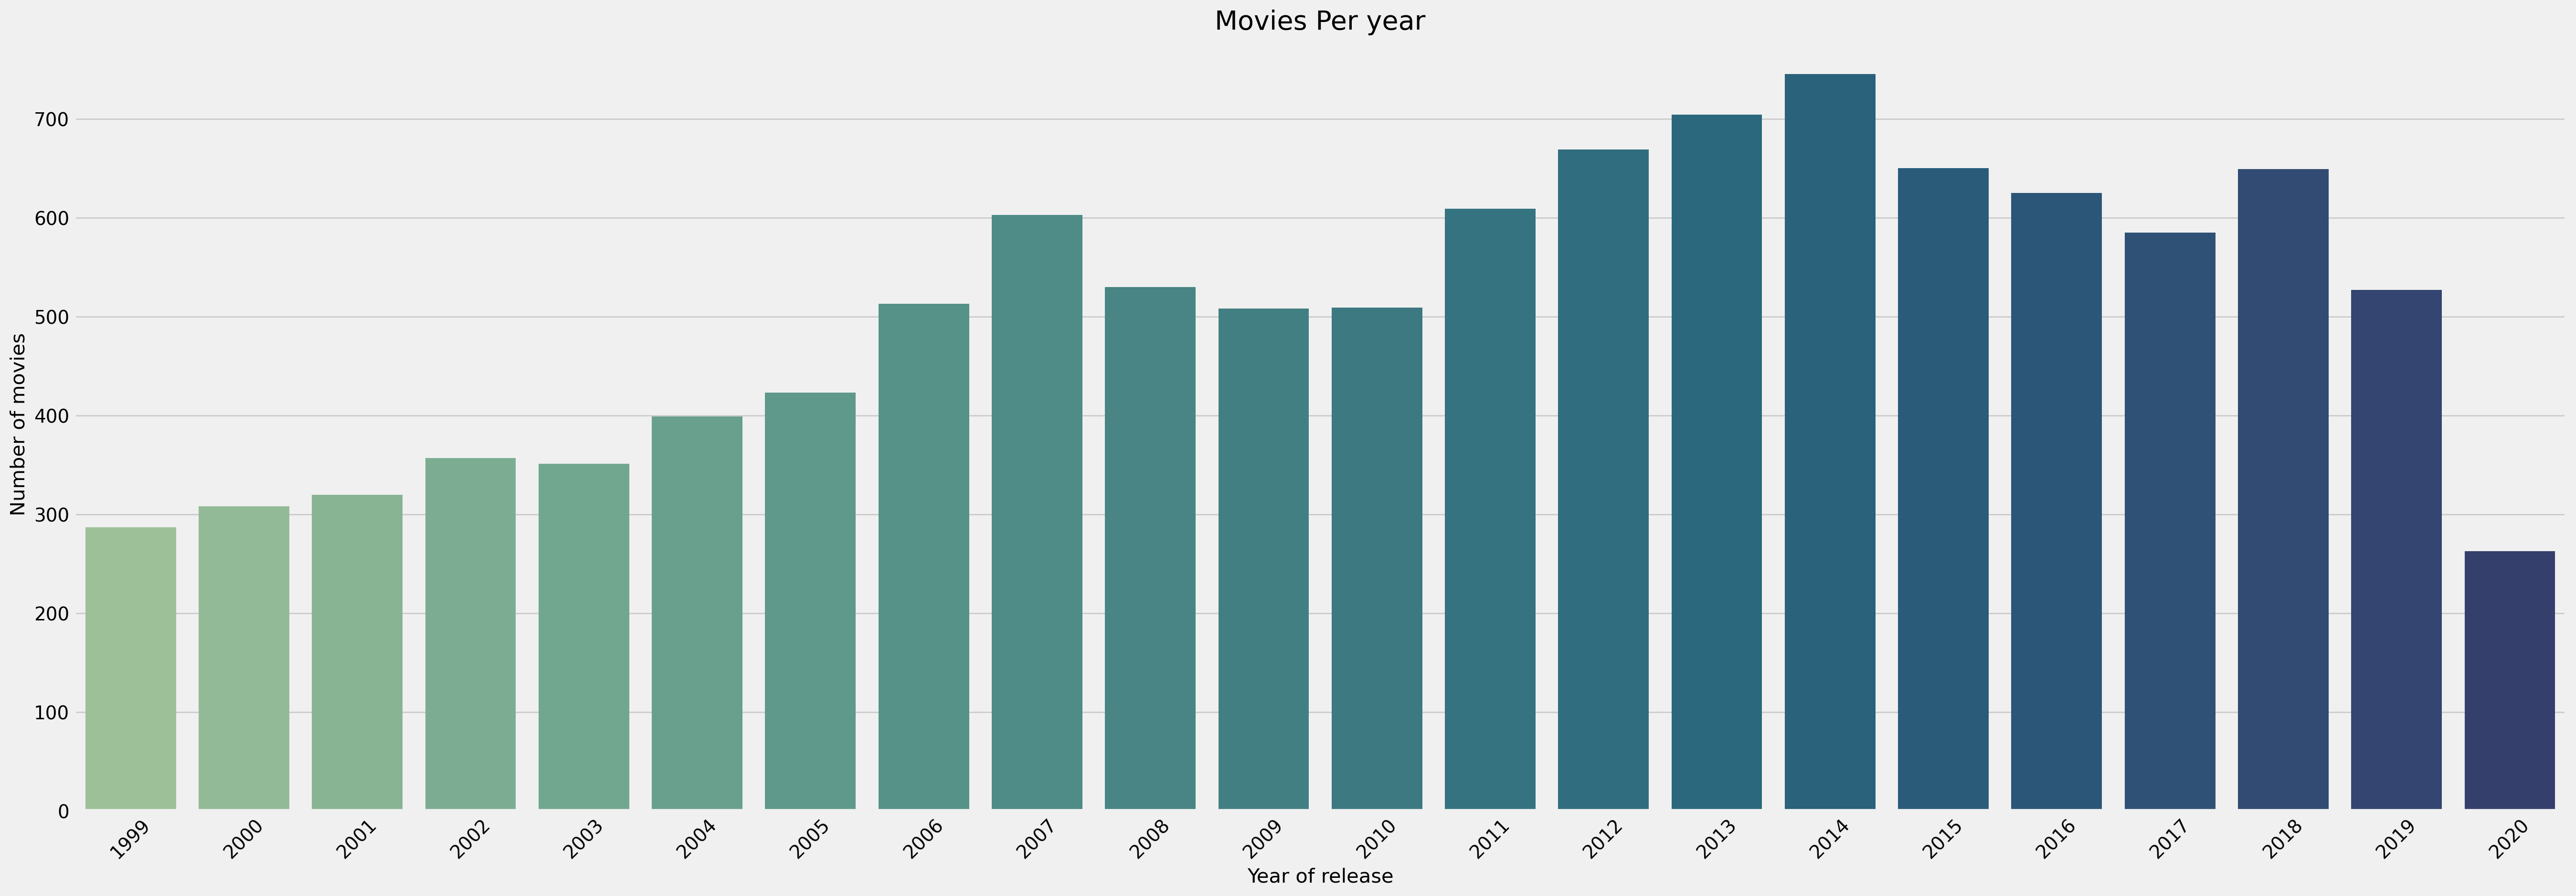

In [25]:
# 'Zoomed in' countplot

#Define size
#sns.set(rc={"figure.figsize":(30, 20)})
plt.figure(figsize=(30,10),dpi=200)

#type of plot
g = sns.countplot(x='movie_year', data=rt_movies_yearblock,palette="crest")

# Interval of years for x
#x_range = np.arange(1920,2020,5)

# label adjusted
#x_labels = ['' if i%5 != 0 else str(i) for i in range(len(np.unique(x_range)))]
#print(x_labels)

#labels
g.set_xticklabels(g.get_xticklabels(), rotation=45)
#g.set_xticklabels(x_labels, rotation=45)
plt.title('Movies Per year', size=20)
plt.ylabel('Number of movies', size=15)
plt.xlabel('Year of release',size=15)

#display it
plt.show()

**New column to display year from review date and set new column as review_year**

In [26]:
rt_critics = rt_critics[rt_critics.review_date.notnull()]
rt_critics['review_date'] = pd.to_datetime(rt_critics['review_date'])
rt_critics['review_year'] = rt_critics['review_date'].apply(lambda x: x.year)

In [27]:
rt_critics_yearblock = rt_critics['review_year'].between(1999, 2020, inclusive = 'both')

In [28]:
rt_critics_yearblock.value_counts()

True     1128619
False       1398
Name: review_year, dtype: int64

**Let's check how many reviews in the dataframe from critics**

In [29]:
#pd.set_option("display.max_rows", 20)
rt_critics['review_year'].value_counts()[:21]

2019    81911
2018    76313
2017    60575
2016    57886
2005    55748
        ...  
2009    49510
2000    49439
2010    47846
2020    45746
2001    26288
Name: review_year, Length: 21, dtype: int64

In [30]:
rt_critics_1999 = rt_critics[rt_critics.review_year.astype(int) >= 1999]

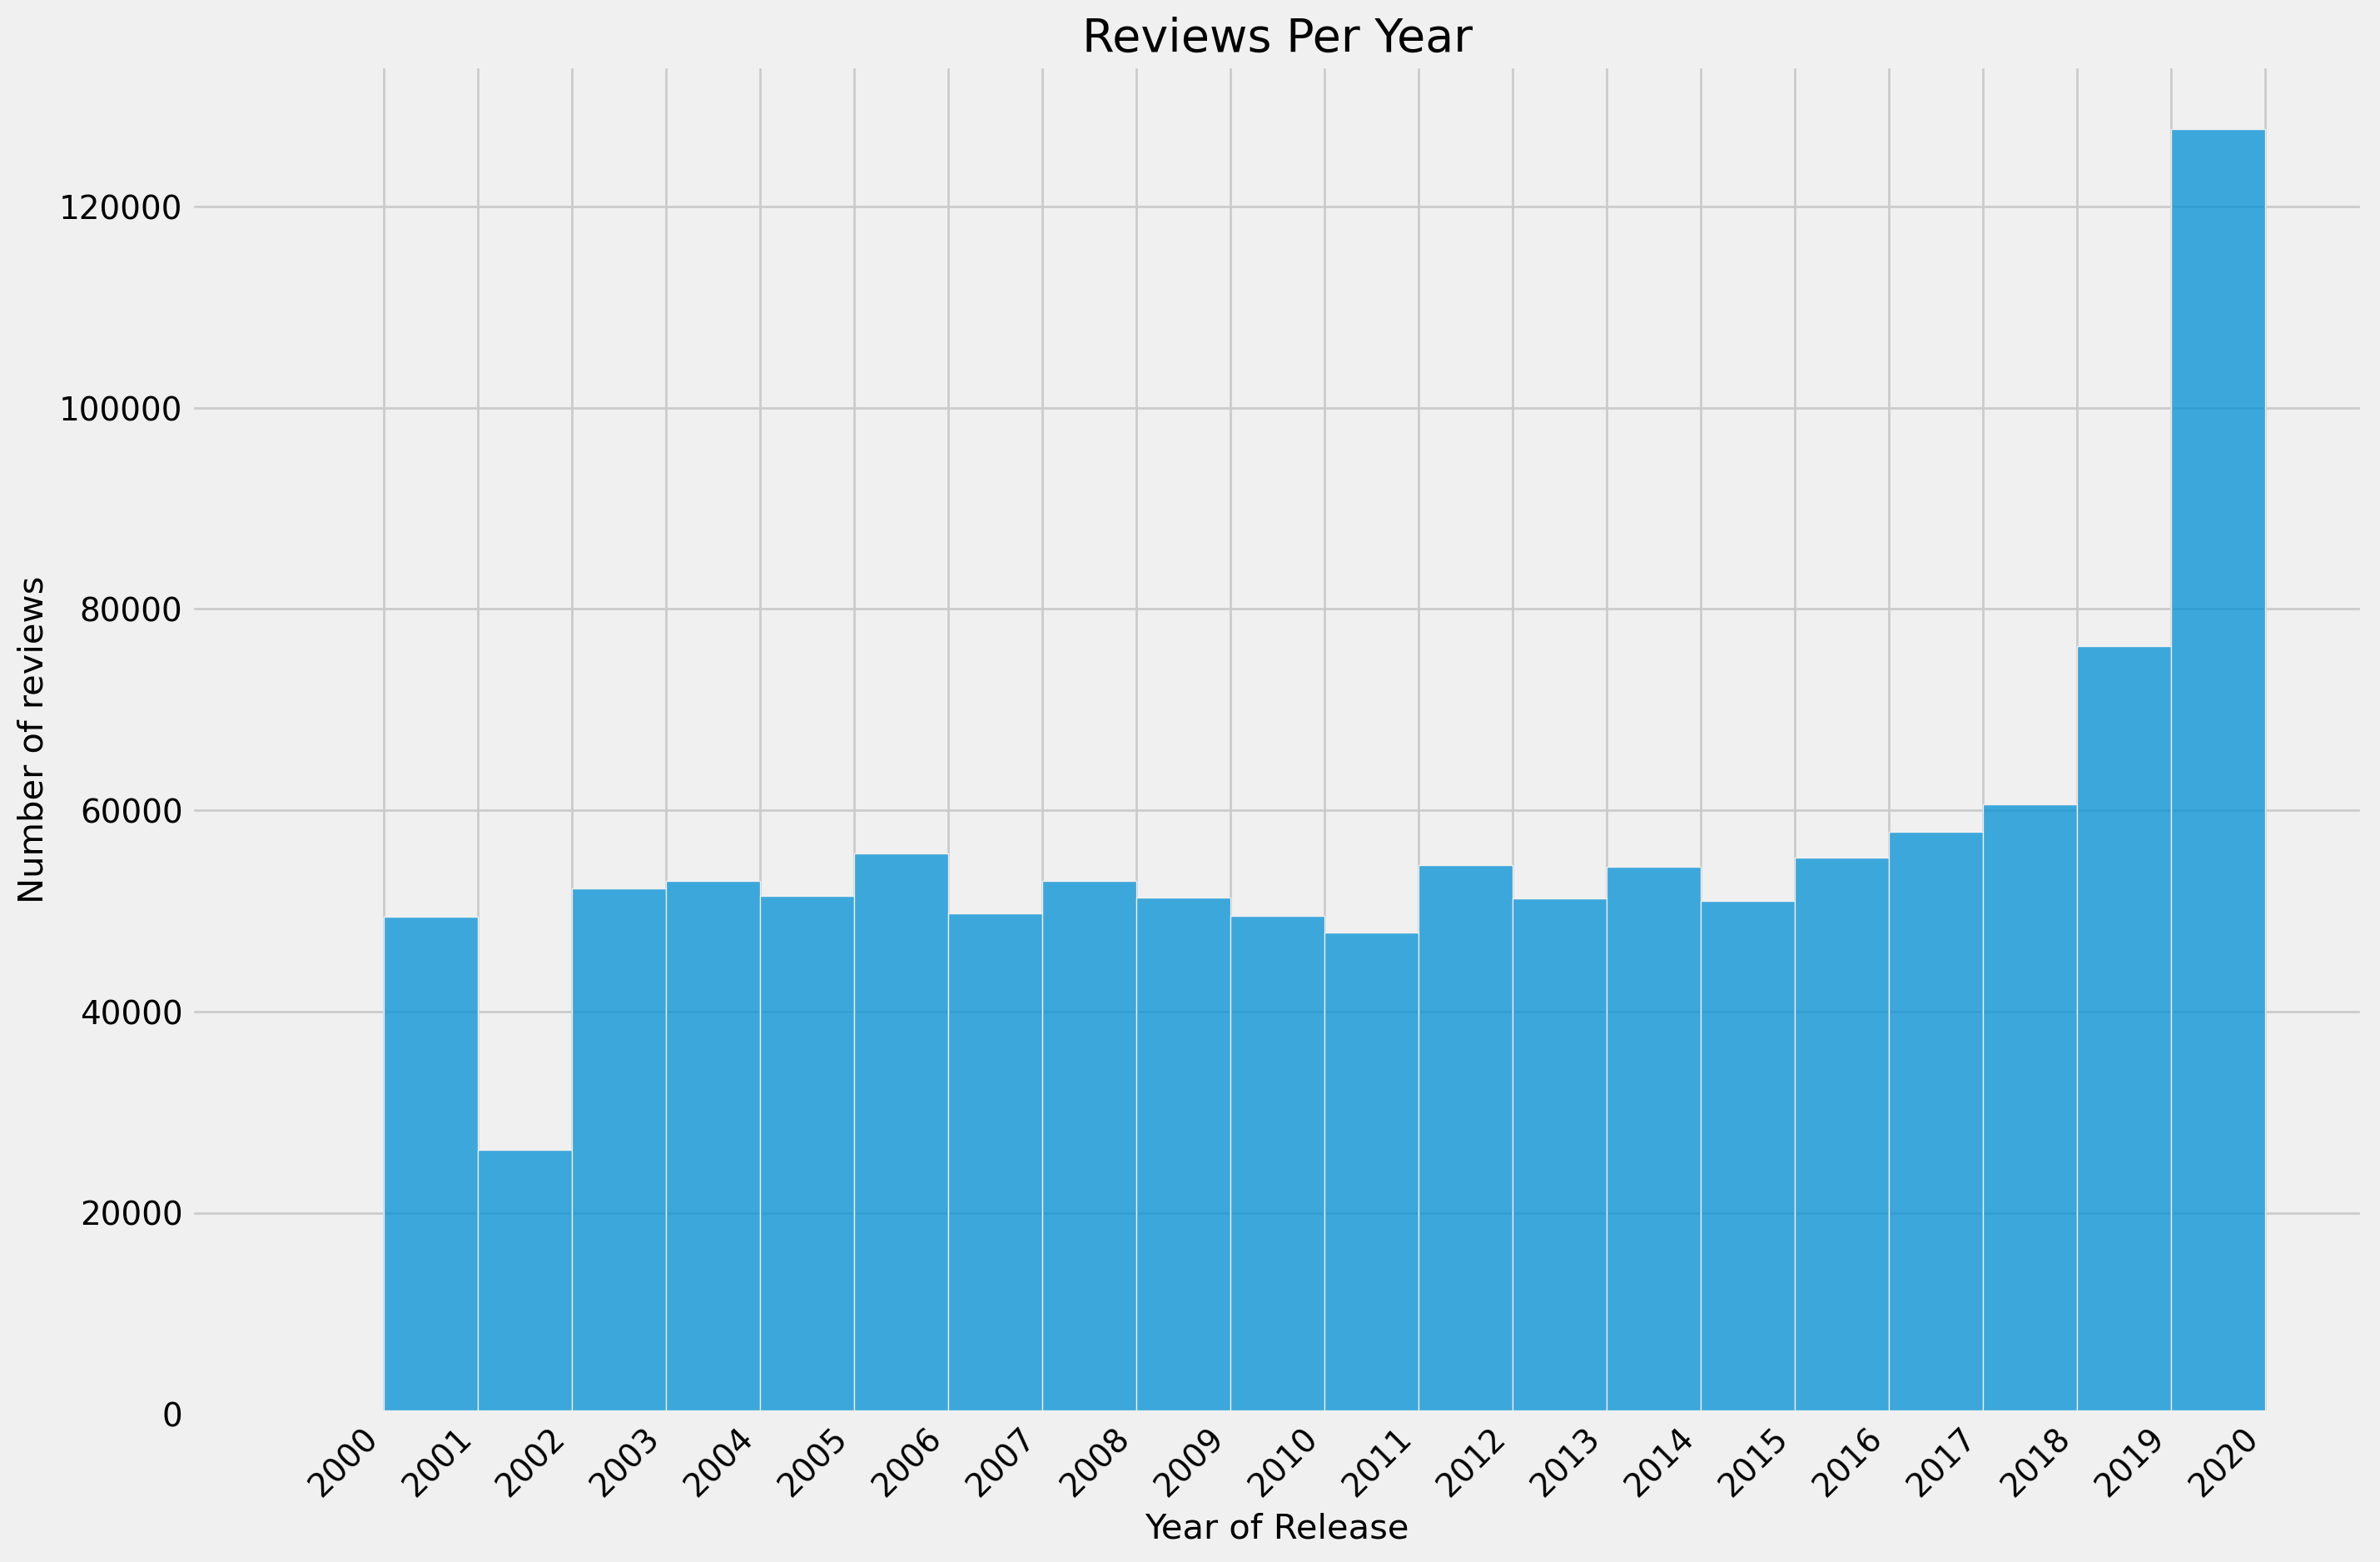

In [31]:
#Total critic reviews per year since 2000
#style setting
plt.style.use('fivethirtyeight')

#visual code
plt.figure(figsize=(15,10), dpi=200)
#palette = sns.color_palette("mako",6)

#plot type
sns.histplot(x='review_year', data=rt_critics_1999, binwidth=1,kde=False)

#labels
plt.title('Reviews Per Year', size=20)
plt.ylabel('Number of reviews', size=15)
plt.xlabel('Year of Release',size=15)
#plt.axis([1920, 2019, 0, 1450])
plt.xticks(np.arange(2000, 2021, step=1),rotation=45, ha='right');

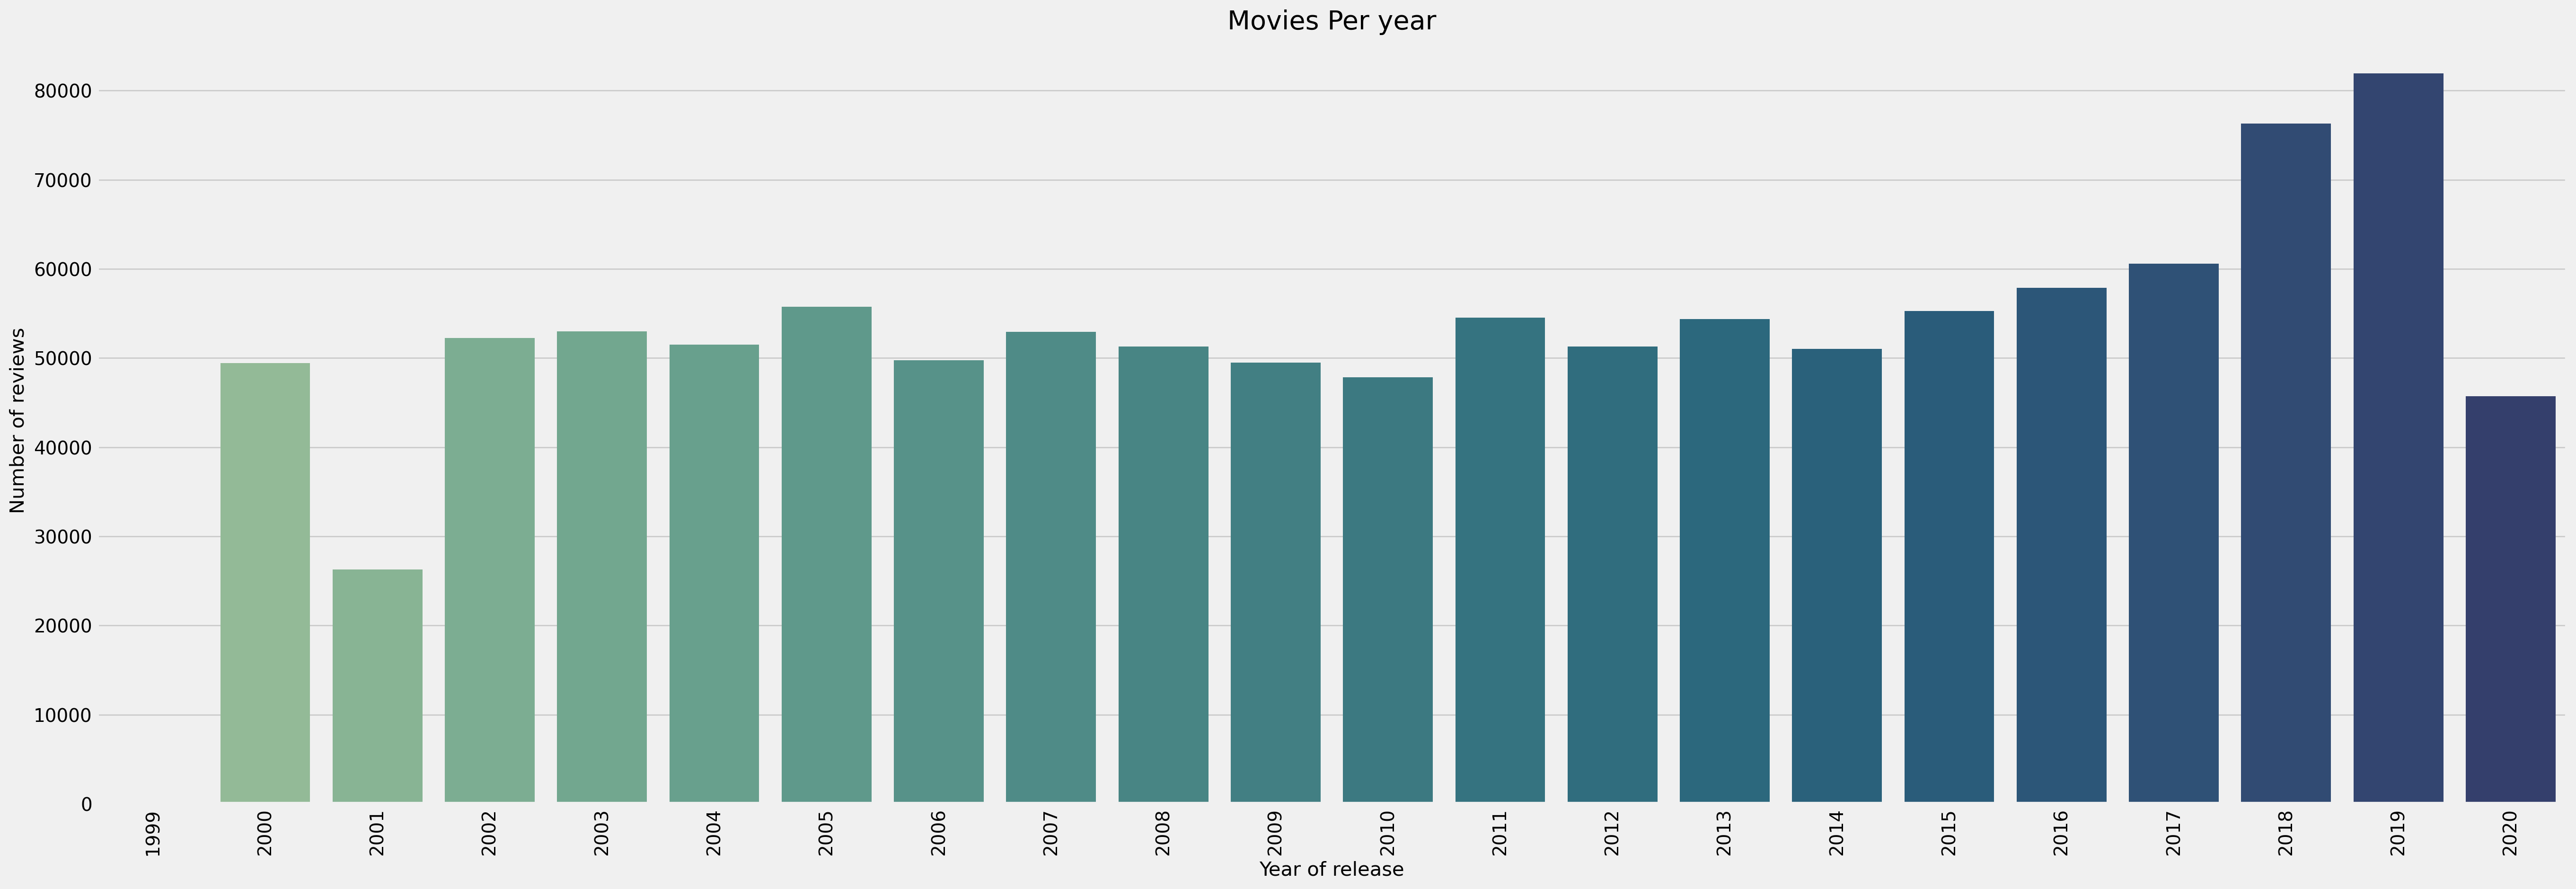

In [32]:
# As a count plot, to show the true count

#Define size
#sns.set(rc={"figure.figsize":(30, 20)})
plt.figure(figsize=(30,10),dpi=200)

#type of plot
g = sns.countplot(x='review_year', data=rt_critics_1999,palette="crest")

# Interval of years for x
#x_range = np.arange(1920,2020,5)

# label adjusted
#x_labels = ['' if i%5 != 0 else str(i) for i in range(len(np.unique(x_range)))]
#print(x_labels)

#labels
g.set_xticklabels(g.get_xticklabels(), rotation=90)
#g.set_xticklabels(x_labels, rotation=45)
plt.title('Movies Per year', size=20)
plt.ylabel('Number of reviews', size=15)
plt.xlabel('Year of release',size=15)

#display it
plt.show()

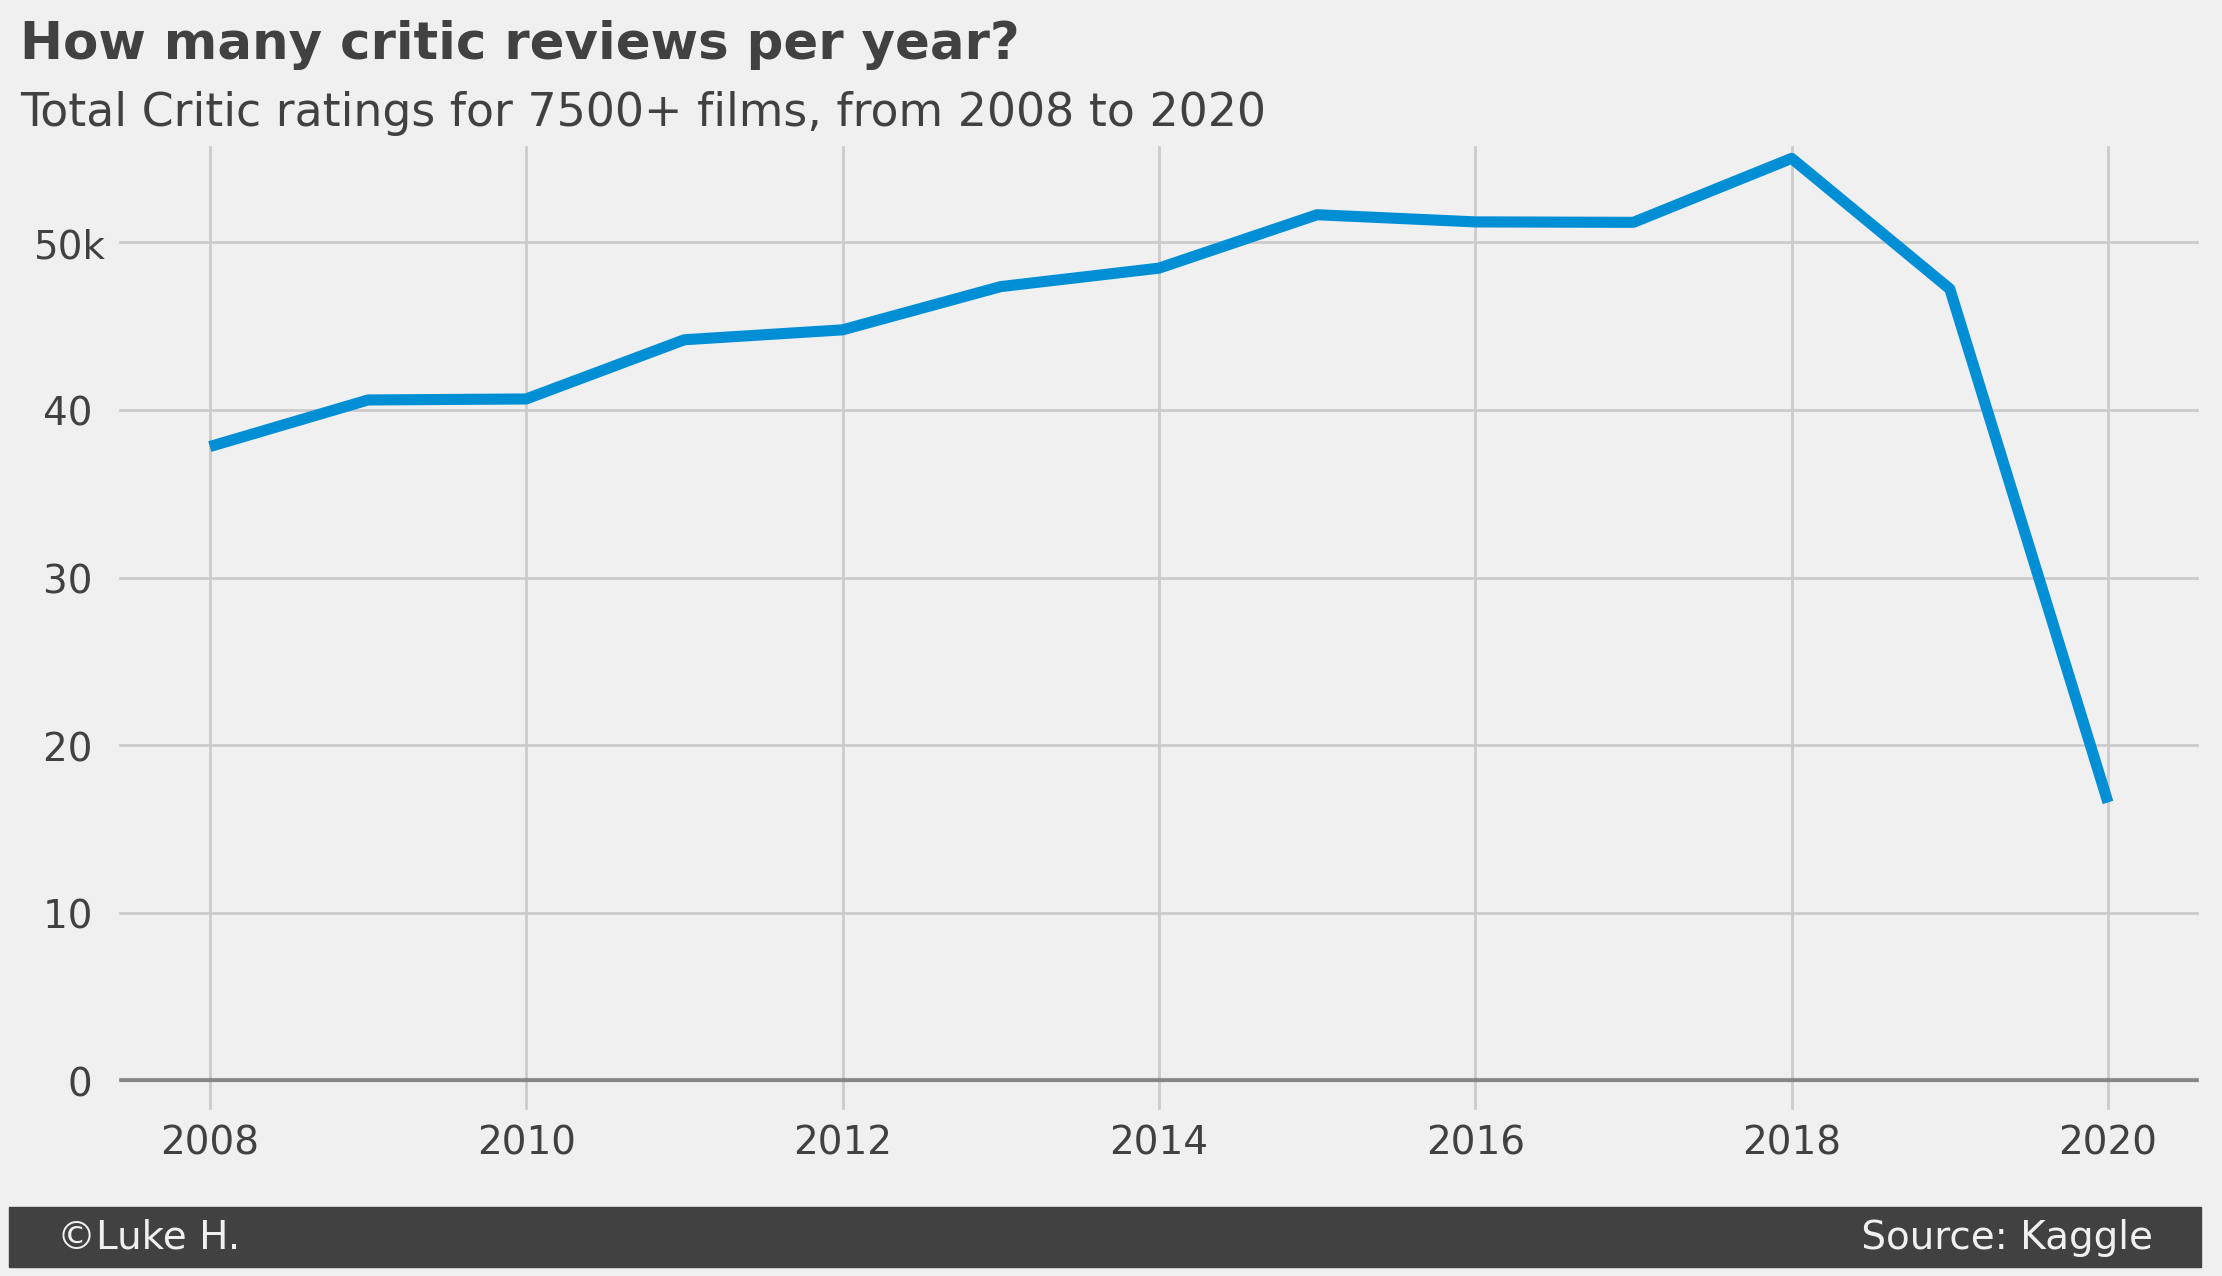

In [33]:
# Determining the number of reviews released per year as a lineplot (more accurate representation)

# manipulating data into new dataframe
rt_mnew = rt_movies_yearblock[['movie_year','tomatometer_count']].copy()
rt_mnew2 = rt_mnew.loc[(rt_mnew['movie_year'] >= 2008) & (rt_mnew['movie_year'] <= 2020)]
rt_mnew3 = rt_mnew2.groupby(['movie_year']).sum()

# setup the plot
fig, ax = plt.subplots(figsize=(12,6),dpi=200)

ax = sns.lineplot(x='movie_year', y='tomatometer_count', data=rt_mnew3, ci=None)

# x,y labels
plt.xlabel("")
plt.ylabel("")


# Bolded horizontal line at y=0
ax.axhline(y=0, color='#414141', linewidth=1.5, alpha=.5) 

# Limits
plt.ylim(-2000,56000)

# y range
ax.set_yticks([0, 10000, 20000, 30000,40000,50000])
ax.set_yticklabels(labels=['0 ', '10 ', '20 ', '30 ', '40 ', '50k'], fontsize=14, color='#414141')

# x range
ax.set_xticks([2008,2010,2012,2014,2016,2018,2020])
ax.set_xticklabels(['2008', '2010', '2012', '2014', '2016','2018','2020'], fontsize=14, color='#414141')

# shade area between y1 and line y=0
#ax.fill_between(x=rt_mnew3['movie_year'],y1=rt_mnew3['tomatometer_count'],
                #facecolor="orange", # The fill color
                #color='blue',       # The outline color
                #alpha=0.2)

# Title text
ax.text(x=2006.8, y=61000, s="How many critic reviews per year?", fontsize=18.5, fontweight='semibold', color='#414141')

# Subtitle text
ax.text(x=2006.8, y=57000, s='Total Critic ratings for 7500+ films, from 2008 to 2020', fontsize=16.5, color='#414141')

# Text labels for each plotted line
#ax.text(x=2010.2, y=46000, s="Critic reviews", fontsize=13, fontweight='semibold', color='#0F95D7')

#Line at bottom for signature line
ax.text(x = 2006.8, y = -10000,
   s = '   ©Luke H.                                                                                                                                   Source: Kaggle   ',
   fontsize = 14, color = '#f0f0f0', backgroundcolor = '#414141');

The number of reviews appear to much flatter between 2000 and 2015, but grew from 2016-18 and a sharp decline 2019-20 (covid)

**Let's take a closer look at the average number of reviews between specific time periods**

In [34]:
#filter data between 2011 and 2015
filtered_df1 = rt_critics[(rt_critics.review_year.astype(int) >= 2011) 
                          & (rt_critics.review_year.astype(int) <= 2015)]

In [35]:
round(filtered_df1['review_year'].value_counts().mean())

53294

In [36]:
#filter data between 2016-2020
filtered_df2 = rt_critics[(rt_critics.review_year.astype(int) >= 2016) 
                          & (rt_critics.review_year.astype(int) <= 2020)]

In [37]:
round(filtered_df2['review_year'].value_counts().mean())

64486

**How many reviews in the dataframe from audience**

In [38]:
rt_movies_1999 = rt_movies[rt_movies.movie_year.astype(int) >= 1999]

Text(2006.8, 84000000, 'Total Audience ratings for 7500+ films, from 2008 to 2020')

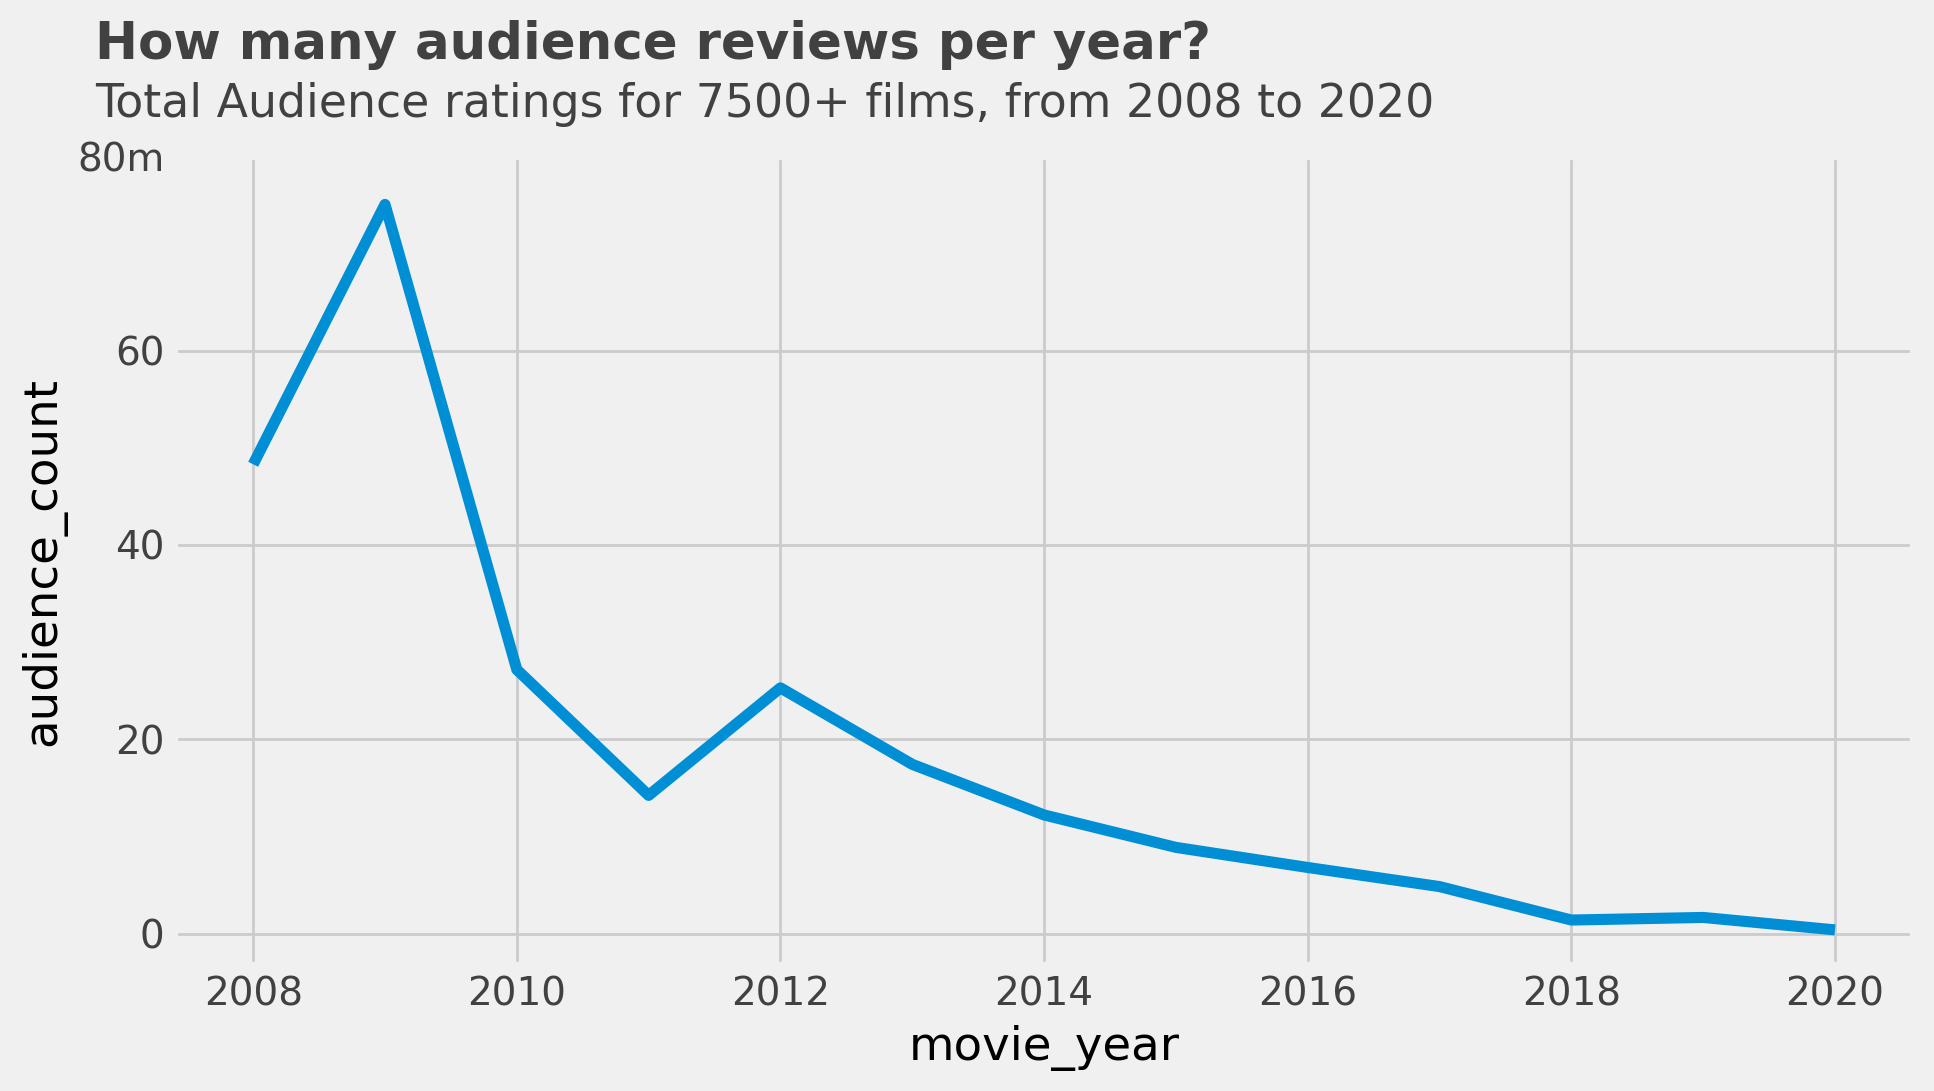

In [39]:
#Total audience reviews per year since 2000

# manipulating data into new dataframe
rt_anew = rt_movies_yearblock[['movie_year','audience_count']].copy()
rt_anew2 = rt_anew.loc[(rt_anew['movie_year'] >= 2008) & (rt_anew['movie_year'] <= 2020)]
rt_anew3 = rt_anew2.groupby(['movie_year']).sum()

#style setting
plt.style.use('fivethirtyeight')

#visual code
fig, ax = plt.subplots(figsize=(10,5),dpi=200)
#plt.figure(figsize=(15,10), dpi=200)

#plot type
ax = sns.lineplot(x='movie_year', y='audience_count', data=rt_anew3)

# y range
ax.set_yticks([0, 20000000, 40000000, 60000000,80000000])
ax.set_yticklabels(labels=['0', '20', '40', '60', '80m'], fontsize=14, color='#414141')

# x range
ax.set_xticks([2008,2010,2012,2014,2016,2018,2020])
ax.set_xticklabels(['2008', '2010', '2012', '2014', '2016','2018','2020'], fontsize=14, color='#414141')

# Title text
ax.text(x=2006.8, y=90000000, s="How many audience reviews per year?", fontsize=18.5, fontweight='semibold', color='#414141')

# Subtitle text
ax.text(x=2006.8, y=84000000, s='Total Audience ratings for 7500+ films, from 2008 to 2020', fontsize=16.5, color='#414141')

#labels
#plt.title('Reviews Per Year', size=20)
#plt.ylabel('Number of reviews', size=15)
#plt.xlabel('Year of Release',size=15)
#plt.axis([1920, 2019, 0, 1450])
#plt.xticks(np.arange(2000, 2021, step=1),rotation=45, ha='right');

**How is the distribution of ratings for audience vs. critics**

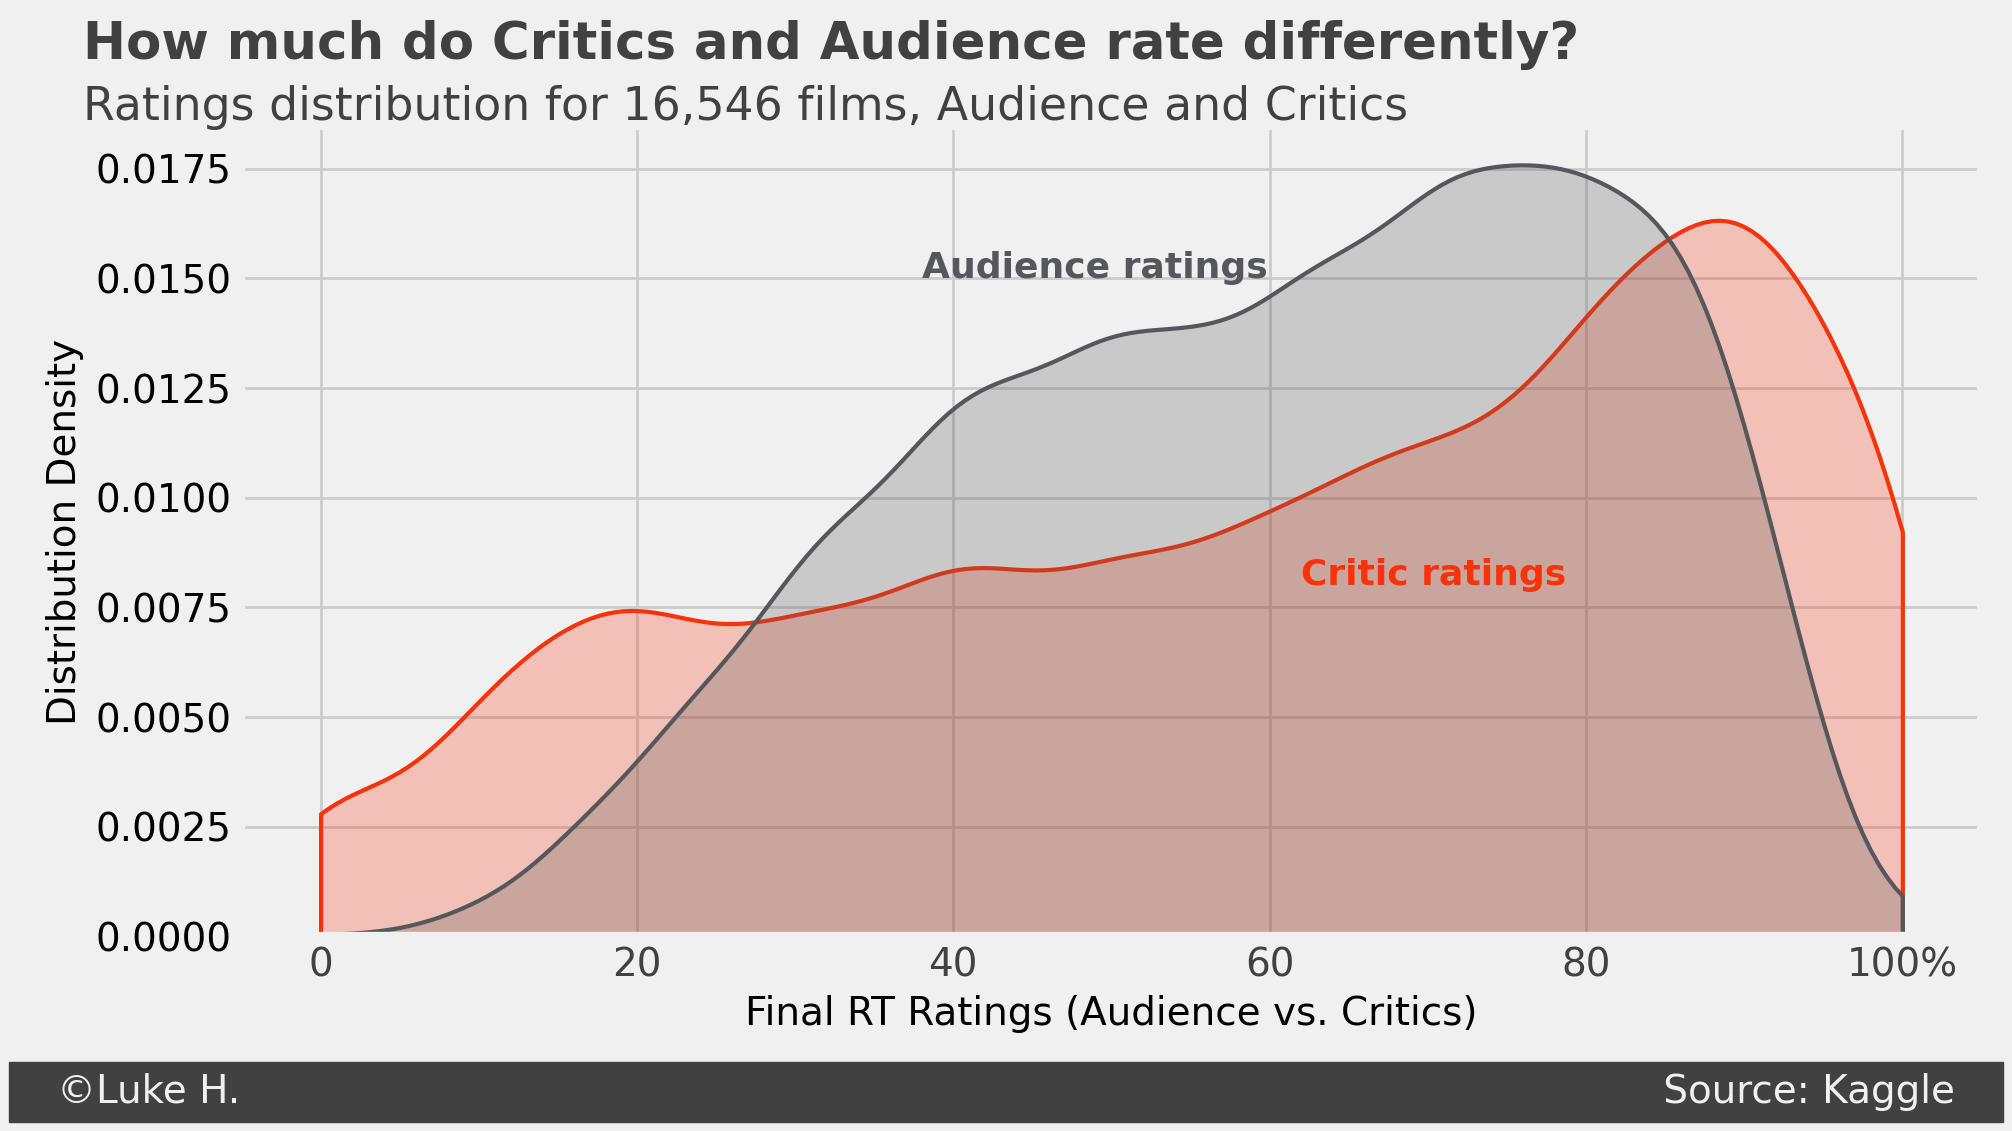

In [145]:
#CODE HERE

#visual code
fig, ax = plt.subplots(figsize=(10,5),dpi=200)

#plt.figure(figsize=(10,4),dpi=150)
ax = sns.kdeplot(data=rt_movies,x='tomatometer_rating',clip=[0,100],fill=True,linewidth = 1.5,
            shade=True,label='Critic Score',color='#FA320A') ##FA320A
ax = sns.kdeplot(data=rt_movies,x='audience_rating',clip=[0,100],fill=True,linewidth = 1.5,
            shade=True,color='#55575A',label='Audience Score')

#labels
plt.ylabel('Distribution Density', fontsize=14)
plt.xlabel('Final RT Ratings (Audience vs. Critics)', fontsize=14)
#plt.title('Comparing Critics and Audience')
#plt.legend(loc=(.02,0.8))

# x range
ax.set_xticks([0,20,40,60,80,100])
ax.set_xticklabels(['0', '20', '40', '60', '80','100%'], fontsize=14, color='#414141')

# Title text
ax.text(x=-15, y=0.02, s="How much do Critics and Audience rate differently?", fontsize=18.5, fontweight='semibold', color='#414141')

# Subtitle text
ax.text(x=-15, y=0.0186, s='Ratings distribution for 16,546 films, Audience and Critics', fontsize=16.5, color='#414141')

# Text labels for each plotted line
ax.text(x=62, y=0.008, s="Critic ratings", fontsize=13, fontweight='semibold', color='#FA320A')
ax.text(x=38, y=0.0150, s="Audience ratings", fontsize=13, fontweight='semibold', color='#55575A')

#Line at bottom for signature line
ax.text(x = -19, y = -0.0038,
   s = '   ©Luke H.                                                                                                                   Source: Kaggle   ',
   fontsize = 14, color = '#f0f0f0', backgroundcolor = '#414141');

It appears the audience skews more highly between 30% and 80%, whereas critics often averages out less in this range.

In [41]:
rt_movies['first_genre'] = rt_movies['genres'].str.split(',').str[0]
rt_movies['first_genre'].value_counts()[:7]

Drama                        3545
Comedy                       3489
Action & Adventure           3364
Art House & International    1922
Documentary                  1544
Classics                     1078
Horror                        838
Name: first_genre, dtype: int64

In [42]:
rt_movies_grouped = rt_movies['first_genre'].sort_values()

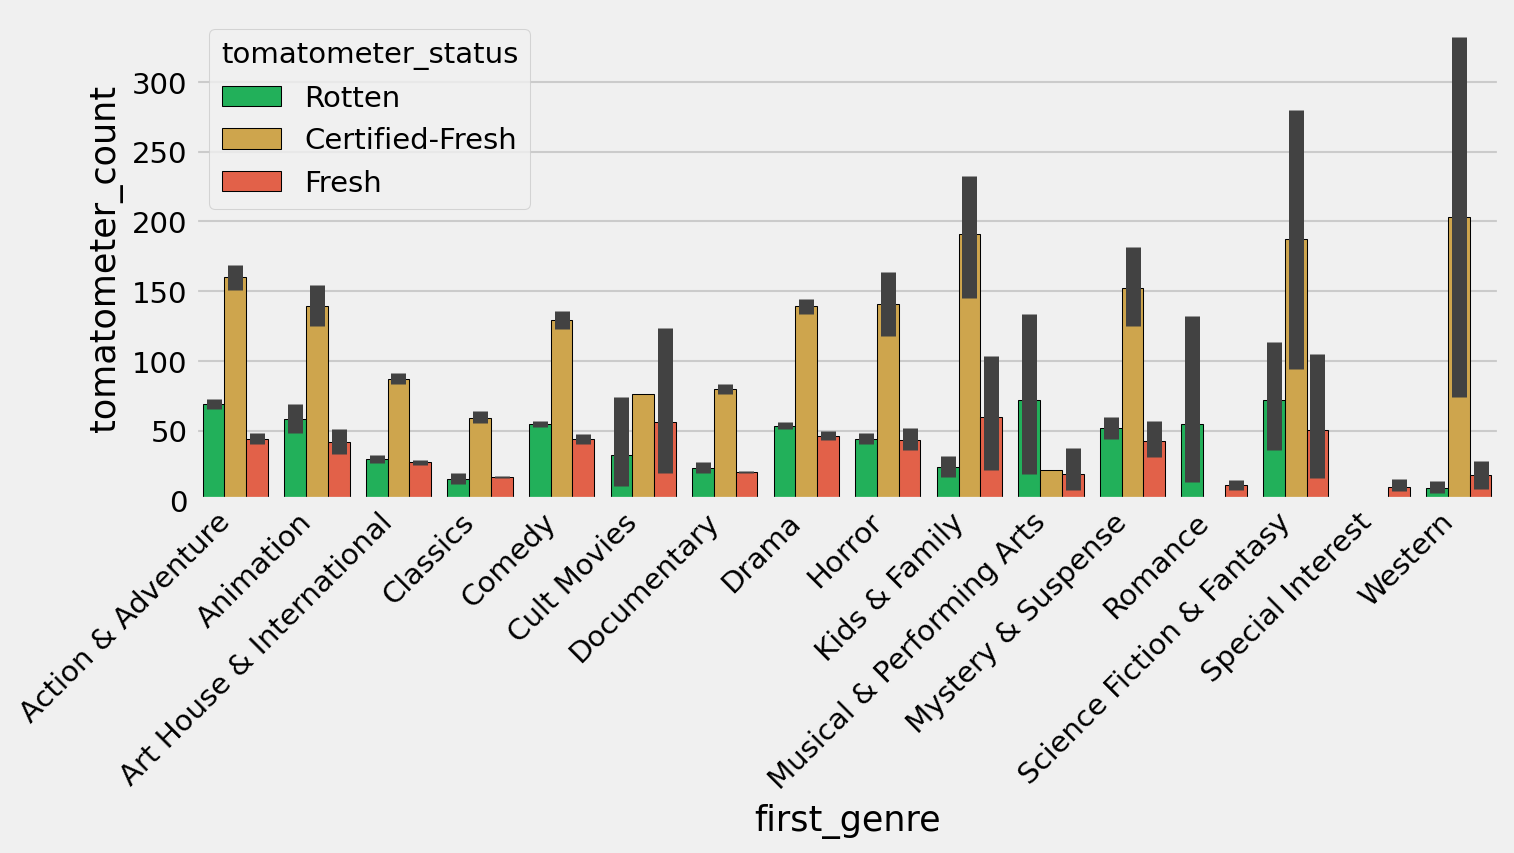

In [43]:
#The amount of reviews per film category, separated by their status
plt.figure(figsize=(10,4),dpi=150)

#color for legend
color_dict = dict({'Rotten':'#0AC855',
                  'Certified-Fresh':'#E4AD37',
                 'Fresh': '#FB4F30'})
#fig, ax = plt.subplots()
sns.barplot(x=rt_movies['first_genre'].sort_values(),y='tomatometer_count',
            hue='tomatometer_status',data=rt_movies,palette=color_dict,
            edgecolor="black")
plt.xticks(rotation=45, ha='right');

In [44]:
#use code for later
#fig, ax = plt.subplots()

# Initialize the bottom at zero for the first set of bars.
#bottom = np.zeros(len(rt_movies['first_genre']))

# Plot each layer of the bar, adding each bar to the "bottom" so
# the next bar starts higher.
#for i, col in enumerate(rt_movies.columns):
  #ax.bar(agg_tips.index, agg_tips[col], bottom=bottom, label=col)
 # bottom += np.array(agg_tips[col])

#ax.set_title('Tips by Day and Gender')
#ax.legend()

**Finding discrepancies in rating status if any**

In [45]:
#use crosstab to create a new dataframe to determine count of fresh and rotten, and calculate how many are fresh
rt_critics_fr = pd.crosstab(rt_critics['rotten_tomatoes_link'],rt_critics['review_type'])
#calculate how many are fresh as percentage as whole number
rt_critics_fr.loc[:,'Fresh'].div(rt_critics_fr.sum(1),axis=0).mul(100).astype(float)

rotten_tomatoes_link
m/+_one_2019                       88.888889
m/+h                               33.333333
m/-_man                            58.333333
m/-cule_valley_of_the_lost_ants    90.000000
m/0814255                          48.993289
                                     ...    
m/zoot_suit                        55.555556
m/zootopia                         97.602740
m/zorba_the_greek                  80.000000
m/zulu                             95.652174
m/zulu_dawn                        50.000000
Length: 17712, dtype: float64

In [46]:
#add percentage calculation to its own new column, in the new data frame
#in setting astype to (str) or removing you can see the decimal, it appears RT uses the whole int, or truncates, etc. 
#and rounds
rt_critics_fr['tomatometer_rating'] = rt_critics_fr.loc[:,'Fresh'].div(rt_critics_fr.sum(1),axis=0).mul(100).astype(float)

In [47]:
# 
rt_critics_fr.loc[['m/bad_boy_bubby']]

review_type           Fresh  Rotten  tomatometer_rating
rotten_tomatoes_link                                   
m/bad_boy_bubby           5       1           83.333333

In [48]:
#shows the rating 'before' it is rounded on the site
rt_critics_fr

review_type                      Fresh  Rotten  tomatometer_rating
rotten_tomatoes_link                                              
m/+_one_2019                        56       7           88.888889
m/+h                                 2       4           33.333333
m/-_man                             21      15           58.333333
m/-cule_valley_of_the_lost_ants      9       1           90.000000
m/0814255                           73      76           48.993289
...                                ...     ...                 ...
m/zoot_suit                          5       4           55.555556
m/zootopia                         285       7           97.602740
m/zorba_the_greek                    8       2           80.000000
m/zulu                              22       1           95.652174
m/zulu_dawn                          4       4           50.000000

[17712 rows x 3 columns]

<AxesSubplot:xlabel='tomatometer_rating', ylabel='Density'>

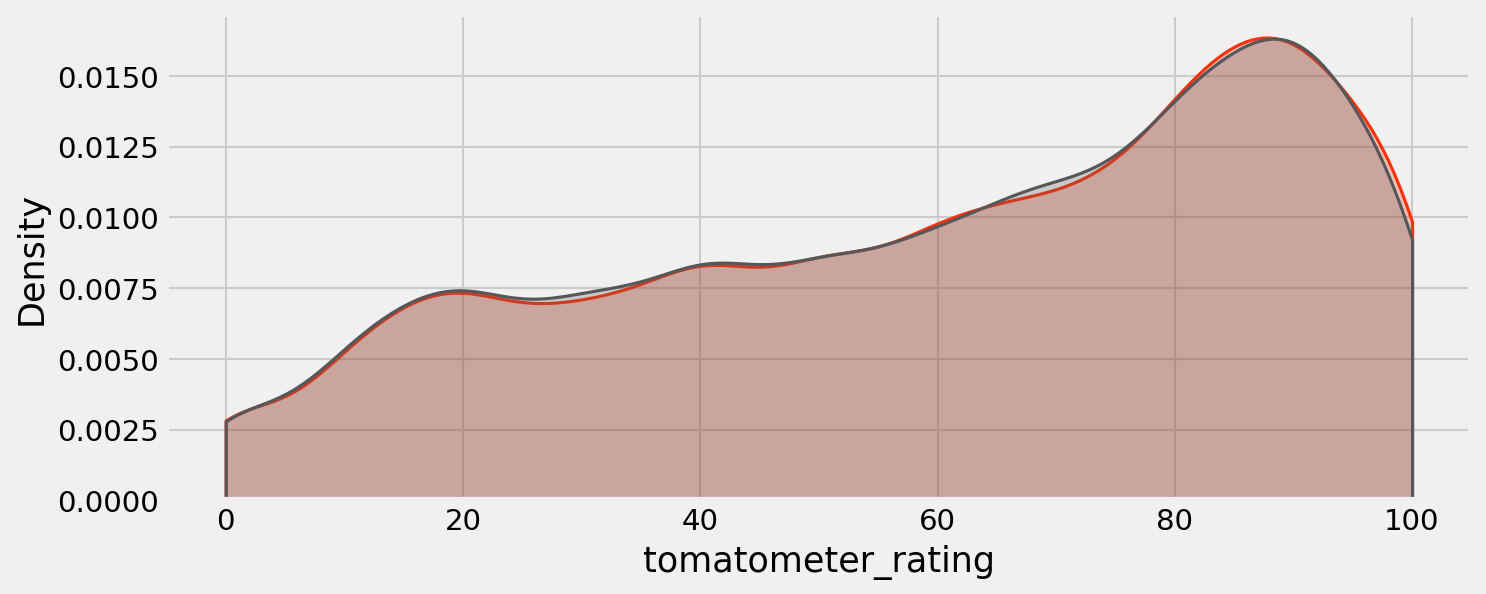

In [49]:
#compare the final rating percentage to the final rating status

plt.figure(figsize=(10,4),dpi=150)
sns.kdeplot(data=rt_critics_fr,x='tomatometer_rating',clip=[0,100],fill=True,linewidth = 1.5,
            shade=True,label='Average Score',color='#FA320A')
sns.kdeplot(data=rt_movies,x='tomatometer_rating',clip=[0,100],fill=True,linewidth = 1.5,
            shade=True,color='#55575A',label='Final Score')

Comparing the critics reviews manually aggregated by how many are considered 'Fresh' with the final Tomatometer Ratings per movie obtained from the RT site matches very closely. There is only very slight discrepancy, let's find out why that is.

In [50]:
#create a dataframe rt_movies with movie as index along with its rating
rt_movies_fr = rt_movies[['rotten_tomatoes_link','tomatometer_rating']].set_index('rotten_tomatoes_link')
rt_movies_fr

tomatometer_rating
rotten_tomatoes_link                                     
m/0814255                                            49.0
m/0878835                                            87.0
m/10                                                 67.0
m/1000013-12_angry_men                              100.0
m/1000079-20000_leagues_under_the_sea                89.0
...                                                   ...
m/zoot_suit                                          56.0
m/zootopia                                           98.0
m/zorba_the_greek                                    80.0
m/zulu                                               96.0
m/zulu_dawn                                          50.0

[16546 rows x 1 columns]

In [51]:
#Drop Columns in rt_critics_fr that we don't need for merge in case for comparing
rt_critics_fr_new = rt_critics_fr.drop(['Fresh','Rotten'], axis = 1, inplace=False)

In [52]:
rt_critics_fr_new.columns.name = None

In [53]:
rt_critics_fr_new

tomatometer_rating
rotten_tomatoes_link                               
m/+_one_2019                              88.888889
m/+h                                      33.333333
m/-_man                                   58.333333
m/-cule_valley_of_the_lost_ants           90.000000
m/0814255                                 48.993289
...                                             ...
m/zoot_suit                               55.555556
m/zootopia                                97.602740
m/zorba_the_greek                         80.000000
m/zulu                                    95.652174
m/zulu_dawn                               50.000000

[17712 rows x 1 columns]

In [54]:
#Merge the two datasets
# Dframe on left
#Merge
combined_df = pd.merge(rt_critics_fr_new, rt_movies_fr, on=['rotten_tomatoes_link'],how='left')
combined_df

tomatometer_rating_x  tomatometer_rating_y
rotten_tomatoes_link                                                       
m/+_one_2019                                88.888889                   NaN
m/+h                                        33.333333                   NaN
m/-_man                                     58.333333                   NaN
m/-cule_valley_of_the_lost_ants             90.000000                   NaN
m/0814255                                   48.993289                  49.0
...                                               ...                   ...
m/zoot_suit                                 55.555556                  56.0
m/zootopia                                  97.602740                  98.0
m/zorba_the_greek                           80.000000                  80.0
m/zulu                                      95.652174                  96.0
m/zulu_dawn                                 50.000000                  50.0

[17712 rows x 2 columns]

The 'tomatometer_rating' appears to be rounded, let's verify that by locating by one of the movies in the 'rt_critics_fr' dataframe. Also a minor limitation of these data sets, 6 movies are missing from the 'rt_movies' dataset.

In [55]:
#using an example
combined_df.loc[['m/+_one_2019']]

tomatometer_rating_x  tomatometer_rating_y
rotten_tomatoes_link                                            
m/+_one_2019                     88.888889                   NaN

In [56]:
#find missing movies from combined_df
df_nan = combined_df[combined_df.isna().any(axis=1)]

In [57]:
df_nan

tomatometer_rating_x  \
rotten_tomatoes_link                                             
m/+_one_2019                                         88.888889   
m/+h                                                 33.333333   
m/-_man                                              58.333333   
m/-cule_valley_of_the_lost_ants                      90.000000   
m/1000643-all_quiet_on_the_western_front            100.000000   
...                                                        ...   
m/your_son                                          100.000000   
m/z_2019                                             96.296296   
m/zambezia                                           25.000000   
m/ziegfeld_follies                                   70.000000   
m/zombie_for_sale                                    89.285714   

                                          tomatometer_rating_y  
rotten_tomatoes_link                                            
m/+_one_2019                                               NaN  
m/+h                                                       NaN  
m/-_man                                                    NaN  
m/-cule_valley_of_the_lost_ants                            NaN  
m/1000643-all_quiet_on_the_western_front                   NaN  
...                                                        ...  
m/your_son                                                 NaN  
m/z_2019                                                   NaN  
m/zambezia                                                 NaN  
m/ziegfeld_follies                                         NaN  
m/zombie_for_sale                                          NaN  

[1202 rows x 2 columns]

Since the datasets are from 2020, many of the films in the set have recently had additional reviews added. In this set about 1202 ratings are missing their actual scores. RT rounds up by one whole number for .5 and greater values. In order to fill in the values below, the 'tomatometer_rating_y' column will use a rounded value from the ' 	tomatometer_rating_x' column.

Two methods further below demonstrating completing each row manually or all in one using fillna.

In [58]:
#fill in values for this dataframe, instead of adding all values needed for rt_movies
#combined_df.replace[['m/+_one_2019']].tomatometer_rating_y = 89
#combined_df['tomatometer_rating_y'] = combined_df['tomatometer_rating_y'].replace(['m/+_one_2019'], 89)
#combined_df.at[["m/+_one_2019"], 'tomatometer_rating_y'] = 89
#combined_df.at[['m/+h'], 'tomatometer_rating_y'] = 33

In [59]:
#find an example to see if it worked
combined_df.loc[['m/+_one_2019']]

tomatometer_rating_x  tomatometer_rating_y
rotten_tomatoes_link                                            
m/+_one_2019                     88.888889                   NaN

In [60]:
#combined_df.at[['m/+h'], 'tomatometer_rating_y'] = 33
#combined_df.at[['m/-_man'], 'tomatometer_rating_y'] = 58
#combined_df.at[['m/-cule_valley_of_the_lost_ants'], 'tomatometer_rating_y'] = 90
#combined_df.at[['m/1019641-splash'], 'tomatometer_rating_y'] = 91
#combined_df.at[['m/1194870-poisoned_by_polonium_the_litvinenko_file'], 'tomatometer_rating_y'] = 64
#combined_df.at[['m/2050'], 'tomatometer_rating_y'] = 20
#combined_df.at[['m/adventures_of_a_teenage_dragonslayer'], 'tomatometer_rating_y'] = 50
#combined_df.at[['m/american_flyers'], 'tomatometer_rating_y'] = 65
#combined_df.at[['m/andre_gregory_before_and_after_dinner'], 'tomatometer_rating_y'] = 75
#combined_df.at[['m/aziz_ansari_live_at_madison_square_garden'], 'tomatometer_rating_y'] = 100
#combined_df.at[['m/bad_therapy'], 'tomatometer_rating_y'] = 8
#combined_df.at[['m/blade_runner_1982'], 'tomatometer_rating_y'] = 92
#combined_df.at[['m/castle_in_the_sky_1989'], 'tomatometer_rating_y'] =
#combined_df.at[['m/charlie_brown_christmas'], 'tomatometer_rating_y'] =
#combined_df.at[['m/disturbing_the_peace_2020'], 'tomatometer_rating_y'] =
#combined_df.at[['m/equals_2016'], 'tomatometer_rating_y'] =
#combined_df.at[['m/farewell_2010'], 'tomatometer_rating_y'] =
#combined_df.at[['m/finding_kim'], 'tomatometer_rating_y'] =
#combined_df.at[['m/hidden_2015'], 'tomatometer_rating_y'] =
#combined_df.at[['m/i_think_were_alone_now_2018'], 'tomatometer_rating_y'] =
#combined_df.at[['m/joy_ride'], 'tomatometer_rating_y'] =
#combined_df.at[['m/king_of_the_ants_2003'], 'tomatometer_rating_y'] =
#combined_df.at[['m/kung_fu_yoga'], 'tomatometer_rating_y'] =
#combined_df.at[['m/le_deuxieme_souffle'], 'tomatometer_rating_y'] =
#combined_df.at[['m/like_a_boss'], 'tomatometer_rating_y'] =
#combined_df.at[['m/on_body_and_soul'], 'tomatometer_rating_y'] =
#combined_df.at[['m/paprika'], 'tomatometer_rating_y'] =
#combined_df.at[['m/patton_oswalt_tragedy_+_comedy_equals_time'], 'tomatometer_rating_y'] =
#combined_df.at[['m/on_body_and_soul'], 'tomatometer_rating_y'] =
#combined_df.at[['m/proximity_2020'], 'tomatometer_rating_y'] =
#combined_df.at[['m/red_cliff'], 'tomatometer_rating_y'] =
#combined_df.at[['m/richard_pryor_live_on_sunset_strip'], 'tomatometer_rating_y'] =
#combined_df.at[['m/proximity_2020'], 'tomatometer_rating_y'] =
#combined_df.at[['m/red_cliff'], 'tomatometer_rating_y'] =
#combined_df.at[['m/richard_pryor_live_on_sunset_strip'], 'tomatometer_rating_y'] =
#combined_df.at[['m/robins_wish'], 'tomatometer_rating_y'] =
#combined_df.at[['m/skin_a_history_of_nudity_in_the_movies'], 'tomatometer_rating_y'] =
#combined_df.at[['m/still_here'], 'tomatometer_rating_y'] =
#combined_df.at[['m/sympathy-for-the-devil-one-+-one'], 'tomatometer_rating_y'] =
#combined_df.at[['m/tall_girl'], 'tomatometer_rating_y'] =
#combined_df.at[['m/tenderness_of_the_wolves'], 'tomatometer_rating_y'] =
#combined_df.at[['m/the_cotton_club_encore'], 'tomatometer_rating_y'] =
#combined_df.at[['m/the_legion'], 'tomatometer_rating_y'] =
#combined_df.at[['m/the_quarry_2020'], 'tomatometer_rating_y'] =
#combined_df.at[['m/the_son_2019'], 'tomatometer_rating_y'] =
#combined_df.at[['m/theyre_inside'], 'tomatometer_rating_y'] =
#combined_df.at[['m/time_for_drunken_horses'], 'tomatometer_rating_y'] =
#combined_df.at[['m/tracey_ullman_live_and_exposed'], 'tomatometer_rating_y'] =
#combined_df.at[['m/we_are_the_heat'], 'tomatometer_rating_y'] =
#combined_df.at[['m/what_we_found'], 'tomatometer_rating_y'] =
#combined_df.at[['m/world_the_flesh_and_the_devil'], 'tomatometer_rating_y'] =
#combined_df.at[['m/you_get_me'], 'tomatometer_rating_y'] =
#combined_df.at[['m/z_2019'], 'tomatometer_rating_y'] =

In [61]:
#all in one go, fill NaN values
combined_df['tomatometer_rating_y'].fillna(round(combined_df['tomatometer_rating_x']), inplace=True)

In [62]:
combined_df

tomatometer_rating_x  tomatometer_rating_y
rotten_tomatoes_link                                                       
m/+_one_2019                                88.888889                  89.0
m/+h                                        33.333333                  33.0
m/-_man                                     58.333333                  58.0
m/-cule_valley_of_the_lost_ants             90.000000                  90.0
m/0814255                                   48.993289                  49.0
...                                               ...                   ...
m/zoot_suit                                 55.555556                  56.0
m/zootopia                                  97.602740                  98.0
m/zorba_the_greek                           80.000000                  80.0
m/zulu                                      95.652174                  96.0
m/zulu_dawn                                 50.000000                  50.0

[17712 rows x 2 columns]

In [63]:
#cell for locating any movie in combined_df (need the tomatoes_link from data set)
#combined_df.loc[['movie_link']]

**Differences to nearest decimal**

In [64]:
combined_df["rating_diff"] = combined_df['tomatometer_rating_y'] - combined_df['tomatometer_rating_x'] 
combined_df['rating_diff'] = combined_df['rating_diff'].round(1)
combined_df

tomatometer_rating_x  tomatometer_rating_y  \
rotten_tomatoes_link                                                          
m/+_one_2019                                88.888889                  89.0   
m/+h                                        33.333333                  33.0   
m/-_man                                     58.333333                  58.0   
m/-cule_valley_of_the_lost_ants             90.000000                  90.0   
m/0814255                                   48.993289                  49.0   
...                                               ...                   ...   
m/zoot_suit                                 55.555556                  56.0   
m/zootopia                                  97.602740                  98.0   
m/zorba_the_greek                           80.000000                  80.0   
m/zulu                                      95.652174                  96.0   
m/zulu_dawn                                 50.000000                  50.0   

                                 rating_diff  
rotten_tomatoes_link                          
m/+_one_2019                             0.1  
m/+h                                    -0.3  
m/-_man                                 -0.3  
m/-cule_valley_of_the_lost_ants          0.0  
m/0814255                                0.0  
...                                      ...  
m/zoot_suit                              0.4  
m/zootopia                               0.4  
m/zorba_the_greek                        0.0  
m/zulu                                   0.3  
m/zulu_dawn                              0.0  

[17712 rows x 3 columns]

<Figure size 1500x600 with 0 Axes>

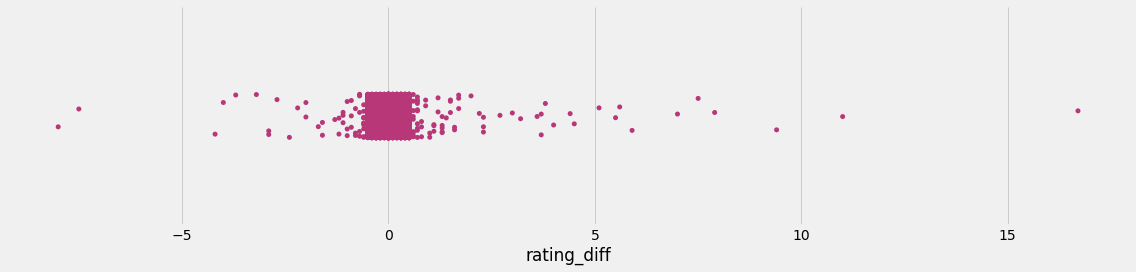

In [65]:
#visualizing the rating_diff
plt.figure(figsize=(10,4),dpi=150)
sns.catplot(data=combined_df,x='rating_diff',palette='magma',height=4, aspect=4)


In [66]:
#finding outliers
combined_df[combined_df['rating_diff'] < -1]

tomatometer_rating_x  tomatometer_rating_y  \
rotten_tomatoes_link                                                          
m/1003747-cat_and_the_canary                96.000000                  94.0   
m/1053942-wolf                              61.111111                  60.0   
m/1061401-village_of_the_damned             30.555556                  29.0   
m/976_evil                                  16.666667                  15.0   
m/born_in_flames                            81.250000                  80.0   
...                                               ...                   ...   
m/styx_2019                                 95.000000                  93.0   
m/the_connection                            78.082192                  77.0   
m/the_prey_2020                             76.190476                  73.0   
m/wishmaster                                28.125000                  27.0   
m/woman_on_the_run                          85.714286                  83.0   

                                 rating_diff  
rotten_tomatoes_link                          
m/1003747-cat_and_the_canary            -2.0  
m/1053942-wolf                          -1.1  
m/1061401-village_of_the_damned         -1.6  
m/976_evil                              -1.7  
m/born_in_flames                        -1.2  
...                                      ...  
m/styx_2019                             -2.0  
m/the_connection                        -1.1  
m/the_prey_2020                         -3.2  
m/wishmaster                            -1.1  
m/woman_on_the_run                      -2.7  

[22 rows x 3 columns]

In [67]:
combined_df[combined_df['rating_diff'] > 1]

tomatometer_rating_x  tomatometer_rating_y  \
rotten_tomatoes_link                                                         
m/10008924-oxford_murders                   9.090909                  17.0   
m/1001117-ape                              40.000000                  43.0   
m/1010695-invisible_man                    92.307692                  94.0   
m/1010889-jamaica_inn                      55.000000                  57.0   
m/1012524-little_women                     88.888889                  94.0   
...                                              ...                   ...   
m/the_believers_1987                       35.294118                  39.0   
m/the_decent_one                           67.741935                  70.0   
m/the_professor_and_the_madman             41.379310                  43.0   
m/the_reflecting_skin                      86.666667                  88.0   
m/two_mules_for_sister_sara                66.666667                  69.0   

                                rating_diff  
rotten_tomatoes_link                         
m/10008924-oxford_murders               7.9  
m/1001117-ape                           3.0  
m/1010695-invisible_man                 1.7  
m/1010889-jamaica_inn                   2.0  
m/1012524-little_women                  5.1  
...                                     ...  
m/the_believers_1987                    3.7  
m/the_decent_one                        2.3  
m/the_professor_and_the_madman          1.6  
m/the_reflecting_skin                   1.3  
m/two_mules_for_sister_sara             2.3  

[44 rows x 3 columns]

There are some big outliers here, but after further research this is due to limitation of these datasets. 'rt_movies' was scraped more currently than 'rt_critics' or for some reason the rt_critics scrape wasn't able to grab all the reviews. The 'y' ratings are correct after looking up the movies on the site. The 'x' ratings from critics are not all yet on the csv (individual fresh/rotten reviews).

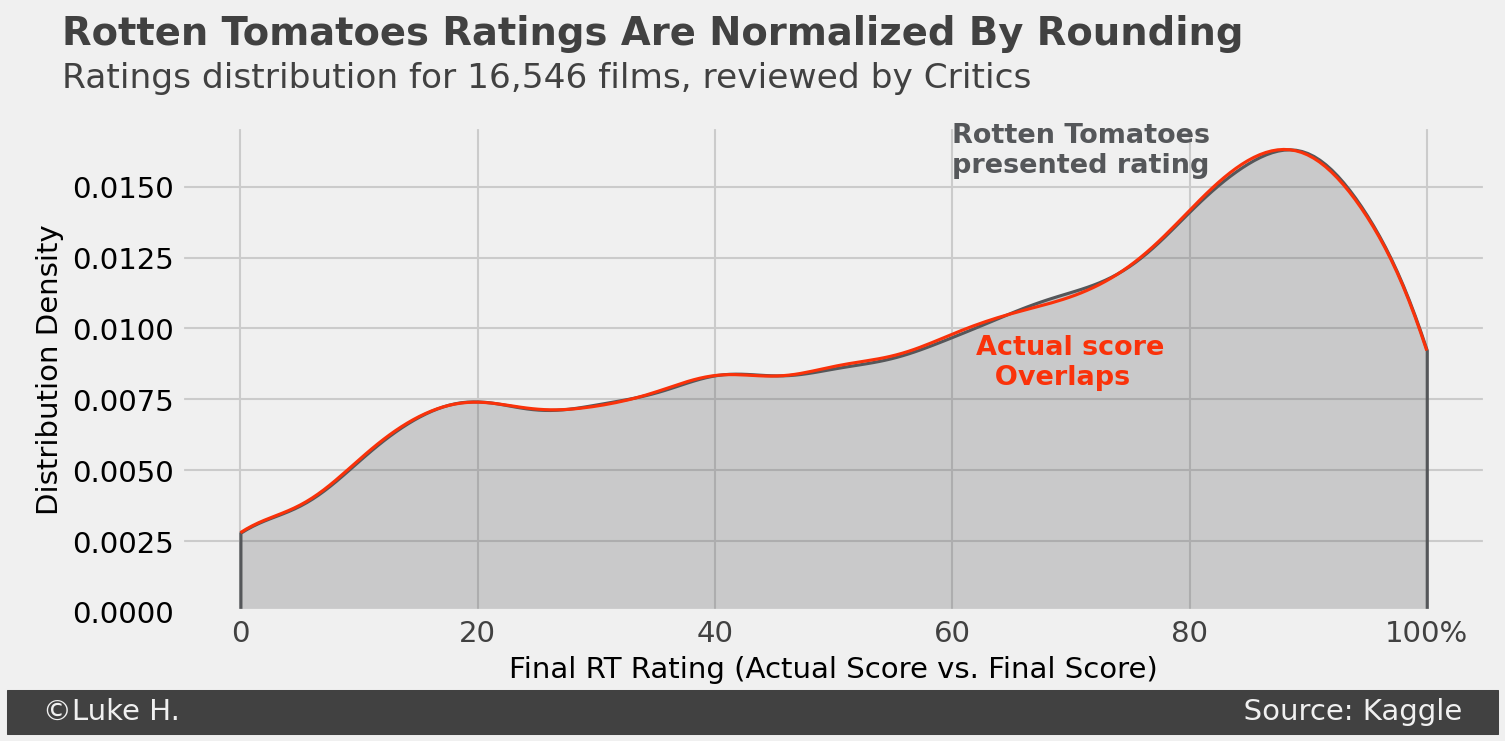

In [135]:
#now the x and y columns should now closely match
plt.figure(figsize=(10,4),dpi=150)
ax = sns.kdeplot(data=combined_df,x='tomatometer_rating_x',clip=[0,100],fill=True,linewidth = 1.5,
            shade=False,label='Average Score',color='#FA320A')
ax = sns.kdeplot(data=combined_df,x='tomatometer_rating_y',clip=[0,100],fill=True,linewidth = 1.5,
            shade=True,color='#55575A',label='final Score')


plt.ylabel('Distribution Density', fontsize=14)
plt.xlabel('Final RT Rating (Actual Score vs. Final Score)', fontsize=14)

# x range
ax.set_xticks([0,20,40,60,80,100])
ax.set_xticklabels(['0', '20', '40', '60', '80','100%'], fontsize=14, color='#414141')

# Title text
ax.text(x=-15, y=0.02, s="Rotten Tomatoes Ratings Are Normalized By Rounding", fontsize=18.5, fontweight='semibold', color='#414141')

# Subtitle text
ax.text(x=-15, y=0.0185, s='Ratings distribution for 16,546 films, reviewed by Critics', fontsize=16.5, color='#414141')

# Text labels for each plotted line
ax.text(x=62, y=0.008, s="Actual score\n  Overlaps", fontsize=13, fontweight='semibold', color='#FA320A')
ax.text(x=60, y=0.0155, s="Rotten Tomatoes\npresented rating", fontsize=13, fontweight='semibold', color='#55575A')

#Line at bottom for signature line
ax.text(x = -19, y = -0.0038,
   s = '   ©Luke H.                                                                                                                   Source: Kaggle   ',
   fontsize = 14, color = '#f0f0f0', backgroundcolor = '#414141');

In [69]:
# finding aggregated movies that dip below final ratings between scores 70 and 75%
#pd.set_option('display.max_rows', 20)
#combined_df[combined_df['tomatometer_rating_x'].between(70,75,inclusive='both')]

In [70]:
#merge year back to frame
rt_movies_year = rt_movies[['movie_year', 'rotten_tomatoes_link']].set_index('rotten_tomatoes_link')
combined_df = pd.merge(combined_df, rt_movies_year, on=['rotten_tomatoes_link'],how='inner')

In [71]:
combined_df

tomatometer_rating_x  \
rotten_tomatoes_link                                          
m/0814255                                         48.993289   
m/0878835                                         86.619718   
m/10                                              66.666667   
m/1000013-12_angry_men                           100.000000   
m/1000079-20000_leagues_under_the_sea             88.888889   
...                                                     ...   
m/zoot_suit                                       55.555556   
m/zootopia                                        97.602740   
m/zorba_the_greek                                 80.000000   
m/zulu                                            95.652174   
m/zulu_dawn                                       50.000000   

                                       tomatometer_rating_y  rating_diff  \
rotten_tomatoes_link                                                       
m/0814255                                              49.0          0.0   
m/0878835                                              87.0          0.4   
m/10                                                   67.0          0.3   
m/1000013-12_angry_men                                100.0          0.0   
m/1000079-20000_leagues_under_the_sea                  89.0          0.1   
...                                                     ...          ...   
m/zoot_suit                                            56.0          0.4   
m/zootopia                                             98.0          0.4   
m/zorba_the_greek                                      80.0          0.0   
m/zulu                                                 96.0          0.3   
m/zulu_dawn                                            50.0          0.0   

                                       movie_year  
rotten_tomatoes_link                               
m/0814255                                    2010  
m/0878835                                    2010  
m/10                                         1979  
m/1000013-12_angry_men                       1957  
m/1000079-20000_leagues_under_the_sea        1954  
...                                           ...  
m/zoot_suit                                  1981  
m/zootopia                                   2016  
m/zorba_the_greek                            1964  
m/zulu                                       1964  
m/zulu_dawn                                  1979  

[16542 rows x 4 columns]

In [72]:
combined_df[['tomatometer_rating_x','tomatometer_rating_y']].apply(lambda d: len(set(d)) == 1, axis=1).value_counts()

False    13114
True      3428
dtype: int64

Out of 16542 films, 3,428 films have the same score between both columns. 13,114 films have slightly different scores, but rounded correctly up or down.

In [73]:
(3428 * 100) / 16542

20.72300810059243

In [74]:
(13114 * 100) / 16542

79.27699189940756

In [75]:
(66 * 100) / 16542
#only about 3.9% discrepancy

0.39898440333696045

**Predicting Critic Growth as Measure of Success for Rotten Tomatoes**

Ever since Rotten Tomatoes decided to expand 'who' can apply as Top Critic, including successful YouTube reviewers, this has likely expanded critic growth registered to the website. In 2018 Rotten Tomatoes revamped critic criteria and qualification for individuals and outlets that produce reviews via podcasts and other digital video series [link](https://www.mediaplaynews.com/rotten-tomatoes-expands-pool-of-critics/).

Perhaps this can be used as measurement of success for RT in general?

Since this data set does not show 'when registered', it may not be possible to accurately demonstrate this. Instead we can see a general idea of the regular and top critics by review posted dates.

In [76]:
rt_criticsu = rt_critics.groupby(['review_year'])['top_critic'].value_counts()

In [77]:
rt_criticsu

review_year  top_critic
1800         True             47
             False            36
1923         False             1
1927         True              3
1928         True              1
                           ...  
2018         True          14045
2019         False         71083
             True          10828
2020         False         40341
             True           5405
Name: top_critic, Length: 142, dtype: int64

In 2020 - 40k+ Critics, 5k+ were Top Critics

Another option would be to create a new dataframe from rt_movies, remove what we don't need, and average out the critics and top critics.

In [78]:
rating_summary = rt_movies.groupby(['movie_year']).agg(avg_rating=('tomatometer_rating', 'mean'),
                                                       avg_total_critics=('tomatometer_count', 'mean'),
                                                       avg_top_critics=('tomatometer_top_critics_count', 'mean'),
                                                       total_films=('movie_year',len)).round(1).reset_index('movie_year')

In [79]:
rating_summary

movie_year  avg_rating  avg_total_critics  avg_top_critics  total_films
0          1914        96.0               26.0             11.0            1
1          1915        88.0               25.0              3.5            2
2          1916        97.0               37.0              7.0            1
3          1919        97.5               13.5              2.5            2
4          1920        85.2               19.2              3.7            6
..          ...         ...                ...              ...          ...
100        2016        60.5               82.1             19.1          625
101        2017        62.2               88.0             18.5          585
102        2018        62.2               85.0             16.5          649
103        2019        63.0               90.0             15.3          527
104        2020        67.0               64.5             11.1          263

[105 rows x 5 columns]

In [80]:
#take snapshot of dataframe from 2000 and onward only
rating_summary = rating_summary.loc[(rating_summary['movie_year'] >= 2000)]

In [81]:
rating_summary

movie_year  avg_rating  avg_total_critics  avg_top_critics  total_films
84         2000        51.6               64.7             18.0          308
85         2001        53.4               76.2             21.7          320
86         2002        53.7               85.2             22.7          357
87         2003        54.1               93.1             25.1          351
88         2004        53.7               87.9             24.0          399
..          ...         ...                ...              ...          ...
100        2016        60.5               82.1             19.1          625
101        2017        62.2               88.0             18.5          585
102        2018        62.2               85.0             16.5          649
103        2019        63.0               90.0             15.3          527
104        2020        67.0               64.5             11.1          263

[21 rows x 5 columns]

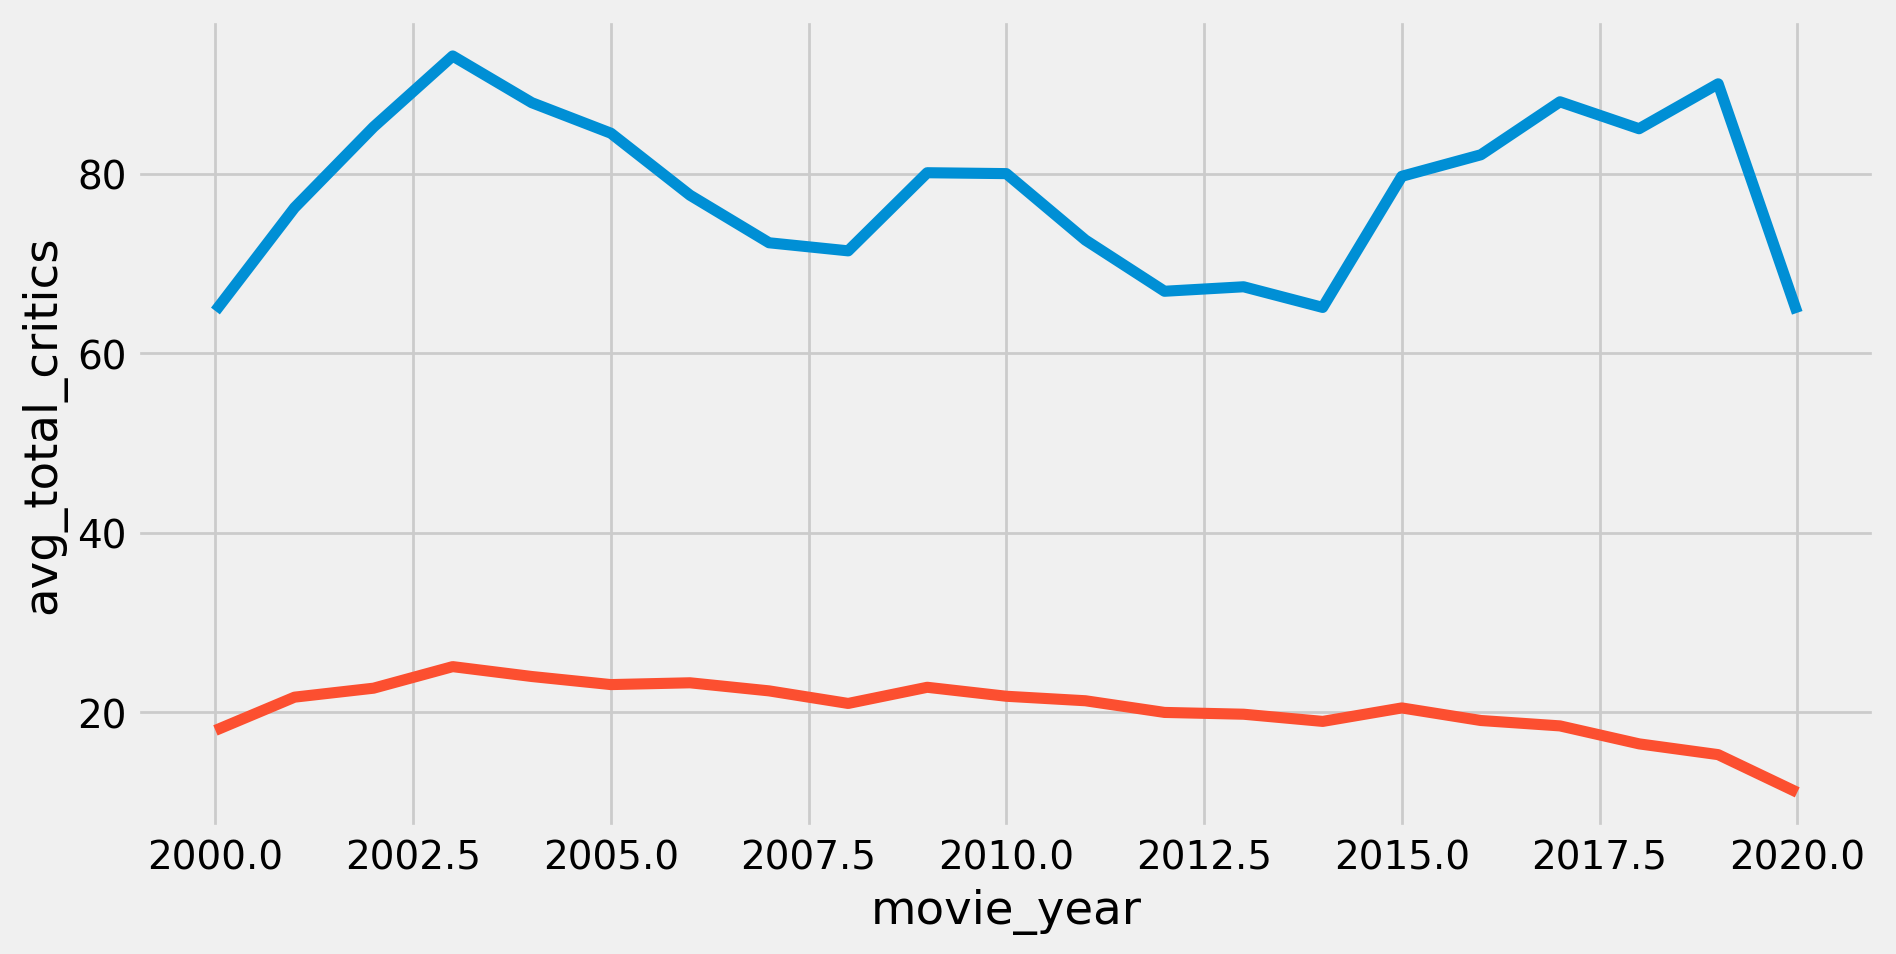

In [82]:
#visual code
fig, ax = plt.subplots(figsize=(10,5),dpi=200)
#plt.figure(figsize=(15,10), dpi=200)

#plot type
ax1 = sns.lineplot(x='movie_year', y='avg_total_critics', data=rating_summary)
ax2 = sns.lineplot(x='movie_year', y='avg_top_critics', data=rating_summary)

A decline again shows for 2020, but again this may be due to the pandemic. This is a limitation of the dataset.

**Statistics findings**